In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings(action='once')

In [ ]:
! apt-get install --yes zip

In [16]:
rm -rf out-of-sample-recsys-diana.susla/

In [19]:
! unzip 'out-of-sample-recsys-diana.susla (91)'

Archive:  out-of-sample-recsys-diana.susla (91).zip
282f69c29742e9bf084e540043508659c37d78da
replace out-of-sample-recsys-diana.susla/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
cd oos/src/src/

/workspace/oos/src/src


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
ls 

KMeans_all_m.png       KNN_r20.png    n100_all_metrics.png
KMeans_all_metric.png  KNN_r20_a.png  n100_all_metrics_k.png
KNN_all_a.png          KNN_r20_g.png  n20_all_metrics.png
KNN_all_g.png          KNN_r20_m.png  n20_all_metrics_k.png
KNN_all_m.png          KNN_r20_y.png  r20_all_metrics.png
KNN_all_y.png          KNN_r50.png    r20_all_metrics_k.png
KNN_n100.png           KNN_r50_a.png  r50_all_metrics.png
KNN_n100_a.png         KNN_r50_g.png  r50_all_metrics_k.png
KNN_n100_g.png         KNN_r50_m.png  recommenders/
KNN_n100_m.png         KNN_r50_y.png  scripts/
KNN_n100_y.png         __pycache__/   settings.py
KNN_n20.png            amazon-book/   spr_functions/
KNN_n20_a.png          database/      test_topK.py
KNN_n20_g.png          gowalla/       utils/
KNN_n20_m.png          metrics.py     yelp2018/
KNN_n20_y.png          ml-1m/


In [22]:
! unzip ml-1m.zip

Archive:  ml-1m.zip
replace ml-1m/movies.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [14]:
mv ../../../ml-1m .

In [2]:
! unzip yelp2018.zip

Archive:  yelp2018.zip
  inflating: yelp2018/item_list.txt  
  inflating: yelp2018/test.txt       
  inflating: yelp2018/train.txt      
  inflating: yelp2018/user_list.txt  


In [11]:
mv ../../../yelp2018 .

In [4]:
! unzip gowalla.zip

Archive:  gowalla.zip
  inflating: gowalla/item_list.txt   
  inflating: gowalla/README.md       
  inflating: gowalla/test.txt        
  inflating: gowalla/train.txt       
  inflating: gowalla/user_list.txt   


In [12]:
mv ../../../gowalla .

In [6]:
! unzip amazon-book.zip

Archive:  amazon-book.zip
  inflating: amazon-book/item_list.txt  
  inflating: amazon-book/README.md   
  inflating: amazon-book/test.txt    
  inflating: amazon-book/train.txt   
  inflating: amazon-book/user_list.txt  


In [40]:
mv ../../../amazon-book .

In [42]:
ls

amazon-book/  metrics.py     scripts/     spr_functions/
database/     recommenders/  settings.py  utils/


In [5]:
! PYTHONPATH=. python3 scripts/preprocess_dataset.py --data=ml-1m

scripts/preprocess_dataset.py:144: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv(
(1000209, 4)
Done!


In [5]:
! nvidia-smi

Wed May 18 09:41:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10          Off  | 00000000:84:00.0 Off |                    0 |
|  0%   56C    P0    61W / 150W |      0MiB / 22731MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['MKL_NUM_THREADS'] = '1'

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_base.py --data=ml-1m --db_path=../results/

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_base.py --data=ml-1m --db_path=../results/

{'num_leaves': <hyperopt.pyll.base.Apply object at 0x7fbe6d94cfd0>}
fitting                                                                         
  0%|          | 0/3674 [00:00<?, ?it/s] | 0/10 [00:00<?, ?trial/s, best loss=?]

  0%|          | 4/3674 [00:03<55:41,  1.10it/s]

  0%|          | 6/3674 [00:05<52:14,  1.17it/s]

  0%|          | 8/3674 [00:06<49:41,  1.23it/s]

  0%|          | 10/3674 [00:08<47:58,  1.27it/s]

  0%|          | 12/3674 [00:09<47:06,  1.30it/s]

  0%|          | 14/3674 [00:11<46:31,  1.31it/s]

  0%|          | 16/3674 [00:12<46:15,  1.32it/s]

  0%|          | 18/3674 [00:14<46:21,  1.31it/s]

  1%|          | 20/3674 [00:15<46:24,  1.31it/s]

  1%|          | 22/3674 [00:17<46:03,  1.32it/s]

  1%|          | 24/3674 [00:18<45:43,  1.33it/s]

  1%|          | 26/3674 [00:20<45:26,  1.34it/s]

  1%|          | 28/3674 [00:21<45:13,  1.34it/s]

  1%|          | 30/3674 [00:23<45:10,  1.34it/s]

  1%|          | 32/3674 [00:24<44:54,  1.35it/s]

  1%|  

Перебор метрик близости

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7fc0b9ccafd0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fc0b9ccaca0>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

braycurtis                                                                      
 12%|#2        | 1/8 [00:03<00:22,  3.27s/it]10 [00:12<?, ?trial/s, best loss=?]

braycurtis                                                                      
 25%|##5       | 2/8 [00:06<00:19,  3.19s/it]10 [00:15<?, ?trial/s, best loss=?]

braycurtis                                                                      
 38%|###7      | 3/8 [00:09<00:15,  3.15s/it]10 [00:19<?, ?trial/s, best loss=?]

braycurtis                                                                      
 50%|#####     | 4/8 [00:12<00:12,  3.14s/it]10 [00:22<?, ?trial/s, best loss=?]

braycurtis                                                                      
 62%|######2   | 5/8 [00:15<00:09,  3.14s/it]10 [00:25<?, 

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7fc73594beb0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fc73594bcd0>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

canberra                                                                        
 12%|#2        | 1/8 [00:04<00:28,  4.08s/it]10 [00:23<?, ?trial/s, best loss=?]

canberra                                                                        
 25%|##5       | 2/8 [00:08<00:23,  3.99s/it]10 [00:27<?, ?trial/s, best loss=?]

canberra                                                                        
 38%|###7      | 3/8 [00:11<00:19,  3.97s/it]10 [00:30<?, ?trial/s, best loss=?]

canberra                                                                        
 50%|#####     | 4/8 [00:15<00:15,  3.95s/it]10 [00:34<?, ?trial/s, best loss=?]

canberra                                                                        
 62%|######2   | 5/8 [00:19<00:11,  3.96s/it]10 [00:38<?, 

In [305]:
sim = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
       'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 
       'kulczynski1', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 
       'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
    
n20 = [0.25, 0.30, 0.05, 0.28, 0.26, 0.25, 0.24, 0.29, 0.30, 0.22, 0.25, 0.05,
       0.01, 0.29, 0.28, 0.28, 0.02, 0.24, 0.30, 0.24, 0.28, 0.27]
n100 = [0.34, 0.34, 0.07, 0.33, 0.34, 0.33, 0.33, 0.34, 0.35, 0.32, 0.33, 0.09,
        0.05, 0.33, 0.33, 0.33, 0.05, 0.29, 0.34, 0.33, 0.33, 0.32]
r20 = [0.26, 0.29, 0.04, 0.28, 0.27, 0.25, 0.25, 0.28, 0.29, 0.24, 0.26, 0.05,
       0.02, 0.28, 0.28, 0.28, 0.03, 0.24, 0.29, 0.26, 0.27, 0.26]
r50 = [0.36, 0.34, 0.07, 0.34, 0.36, 0.35, 0.35, 0.34, 0.35, 0.34, 0.35, 0.09,
       0.04, 0.34, 0.34, 0.34, 0.05, 0.30, 0.35, 0.36, 0.34, 0.32]

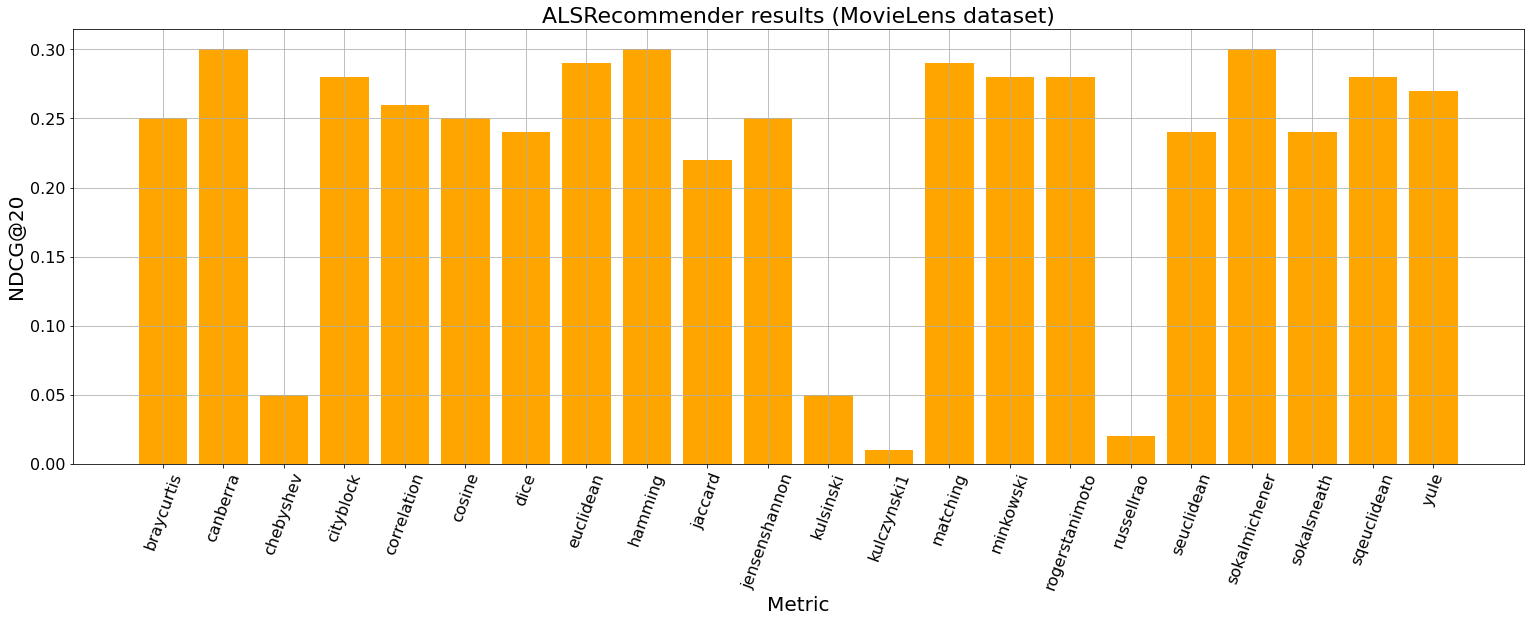

In [310]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender results (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), n20, color='orange')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('n20_all_metrics.png', bbox_inches = 'tight')
plt.show()

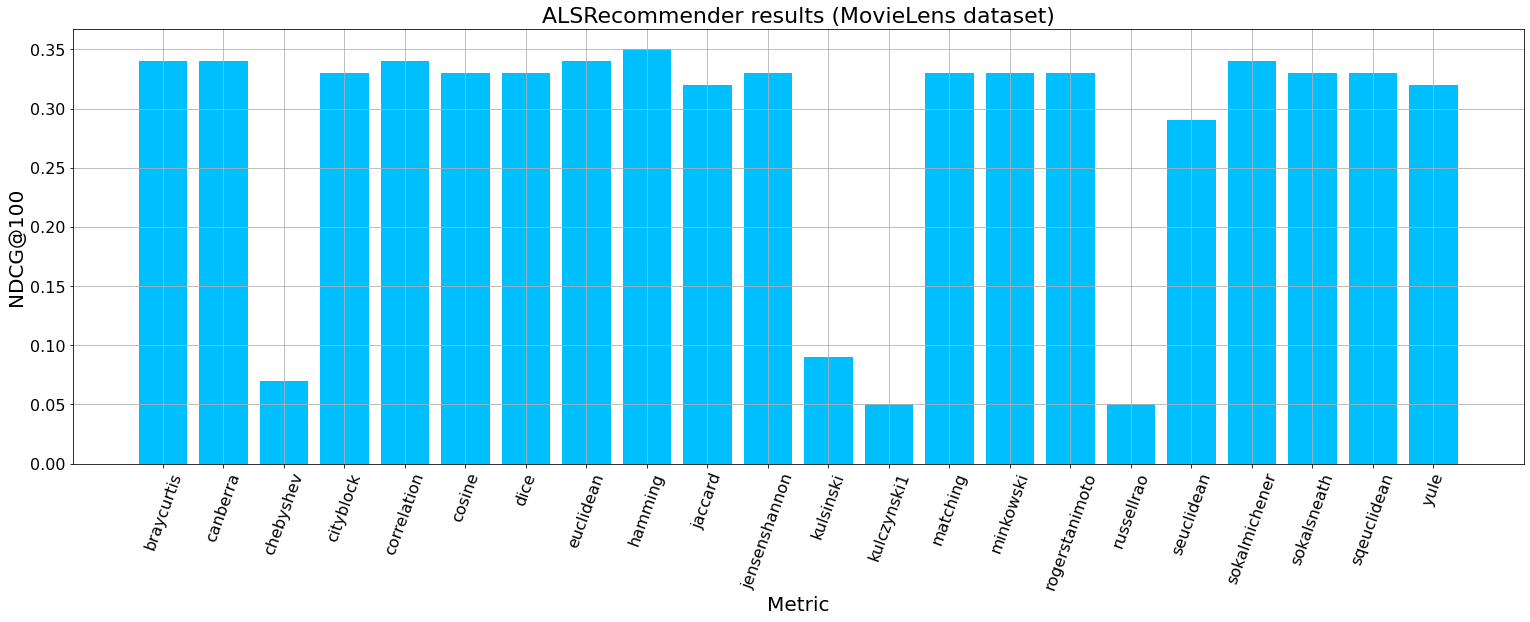

In [311]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender results (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), n100, color='deepskyblue')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('n100_all_metrics.png', bbox_inches = 'tight')
plt.show()

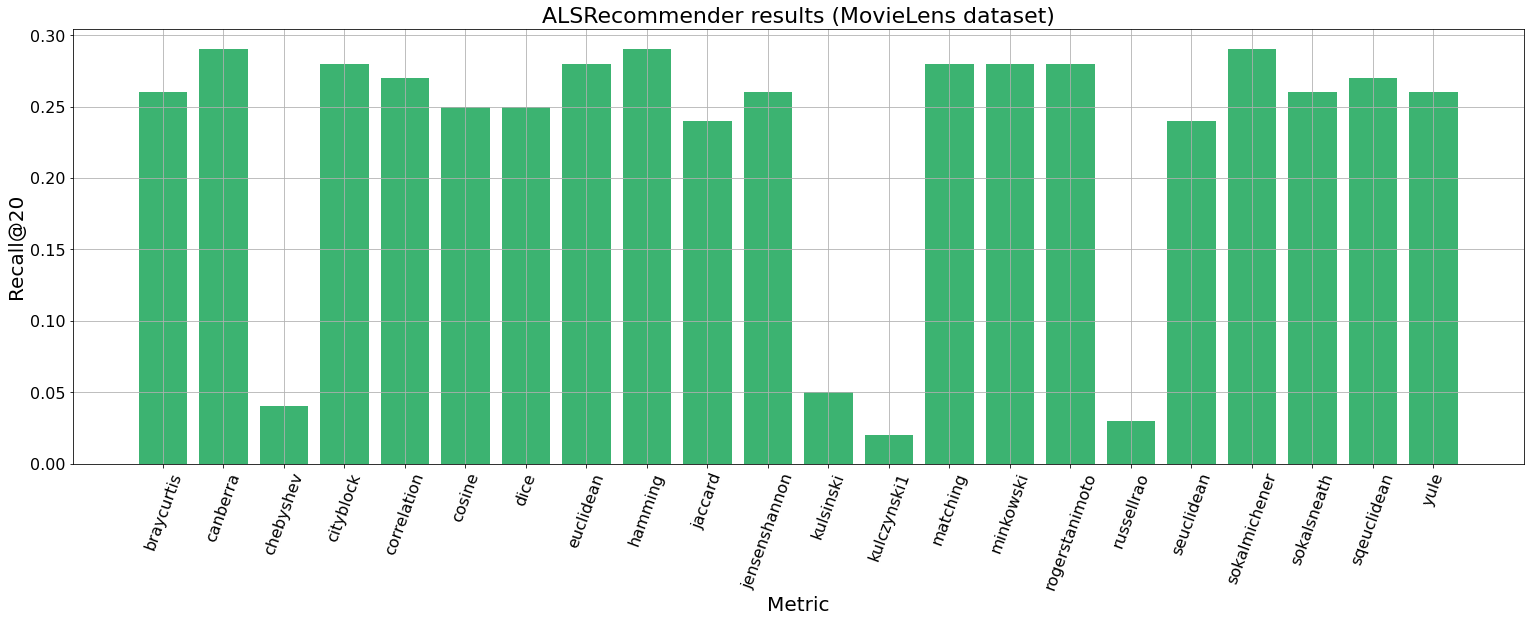

In [312]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender results (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), r20, color='mediumseagreen')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('r20_all_metrics.png', bbox_inches = 'tight')
plt.show()

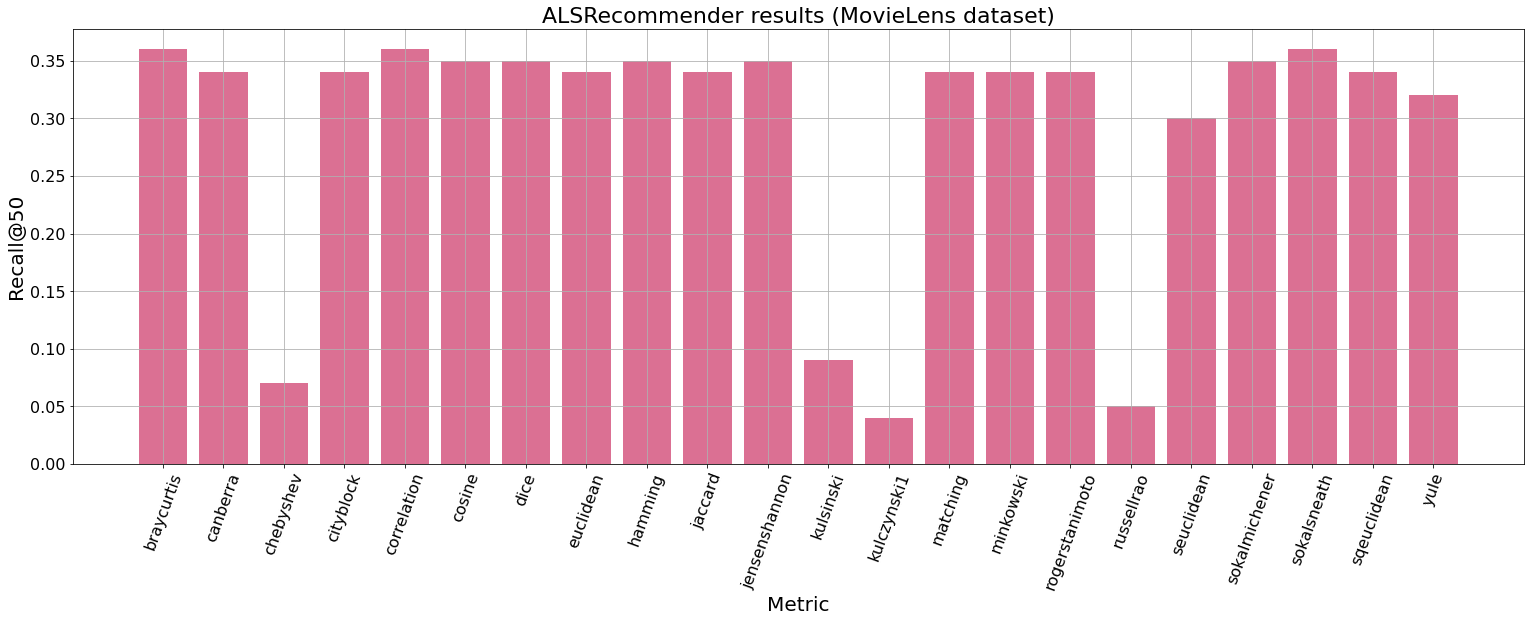

In [313]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender results (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), r50, color='palevioletred')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('r50_all_metrics.png', bbox_inches = 'tight')
plt.show()

Усреднение

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7f3a5d6707f0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f3a5d670d30>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
 12%|#2        | 1/8 [00:06<00:47,  6.85s/it]10 [00:20<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
 25%|##5       | 2/8 [00:13<00:40,  6.78s/it]10 [00:27<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
 38%|###7      | 3/8 [00:20<00:34,  6.82s/it]10 [00:34<?, ?trial/s, best loss=?]

canberra                                                   

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7fe78b1cc7f0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fe78b1ccd30>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
 12%|#2        | 1/8 [00:11<01:20, 11.49s/it]10 [00:13<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
 25%|##5       | 2/8 [00:23<01:09, 11.50s/it]10 [00:25<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                     

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7feb436557f0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7feb43655d30>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
sokalsneath                                                                     
 12%|#2        | 1/8 [00:15<01:51, 15.90s/it]10 [00:25<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
sokalsneath                                                                     
 25%|##5       | 2/8 [00:31<01:35, 15.85s/it]10 [00:41<?, ?tr

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

{'alpha': <hyperopt.pyll.base.Apply object at 0x7f793ced9bb0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f793ced9f70>}
  0%|          | 0/8 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
sokalsneath                                                                     
 12%|#2        | 1/8 [00:16<01:53, 16.18s/it]10 [00:16<?, ?trial/s, best loss=?]

canberra                                                                        
hamming                                                                         
sokalmichener                                                                   
sokalsneath                                                                     
 25%|##5       | 2/8 [00:32<01:37, 16.24s/it]10 [00:32<?, ?tr

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f75a6240b50>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f75a553cad0>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

  0%|          | 0/8 [00:00<?, ?it/s]

sokalmichener
hamming
canberra
braycurtis
 12%|#2        | 1/8 [00:22<02:39, 22.75s/it]

sokalmichener
hamming
canberra
braycurtis
 25%|##5       | 2/8 [00:45<02:16, 22.68s/it]

sokalmichener
ha

##Кластеризация

Усреднение

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7fdeb9eda650>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fdeb9edaf90>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

braycurtis
correlation
canberra
hamming
sokalmichener
sokalsneath
 12%|#2        | 1/8 [00:18<02:11, 18.76s/it]

braycurtis
correlation
canberra
hamming
sokalmichener
sokal

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f1724ef2b50>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f1724ef23d0>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

dice
jaccard
correlation
cosine
euclidean
cityblock
 12%|#2        | 1/8 [00:14<01:41, 14.54s/it]

dice
jaccard
correlation
cosine
euclidean
cityblock
 25%|##5       | 2/8 

Тестирование разных метрик

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7fb78216f2d0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fb78218af90>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

braycurtis
 12%|#2        | 1/8 [00:22<02:35, 22.24s/it]

braycurtis
 25%|##5       | 2/8 [00:44<02:12, 22.09s/it]

braycurtis
 38%|###7      | 3/8 [01:06<01:50, 22.03s/it]

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7ff7cf8d7c90>, 'factors': <hyperopt.pyll.base.Apply object at 0x7ff7af27af10>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

jaccard
 12%|#2        | 1/8 [00:30<03:32, 30.40s/it]

jaccard
 25%|##5       | 2/8 [01:00<03:02, 30.34s/it]

jaccard
 38%|###7      | 3/8 [01:31<02:31, 30.33s/it]

jaccard

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7efb8d3d6d90>, 'factors': <hyperopt.pyll.base.Apply object at 0x7efb8d3d6e90>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

matching
 12%|#2        | 1/8 [00:22<02:35, 22.20s/it]

matching
 25%|##5       | 2/8 [00:44<02:12, 22.11s/it]

matching
 38%|###7      | 3/8 [01:06<01:50, 22.13s/it]

matc

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7fa86b054cd0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7fa88a08df10>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

russellrao
 12%|#2        | 1/8 [00:22<02:34, 22.00s/it]

russellrao
 25%|##5       | 2/8 [00:43<02:11, 21.85s/it]

russellrao
 38%|###7      | 3/8 [01:05<01:48, 21.80s/it]

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f830a816ed0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f8329869950>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

sokalsneath
 12%|#2        | 1/8 [00:15<01:49, 15.62s/it]

sokalsneath
 25%|##5       | 2/8 [00:33<01:40, 16.76s/it]

sokalsneath
 38%|###7      | 3/8 [00:49<01:22, 16.52s/

In [314]:
sim = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
       'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 
       'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 
       'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
    
n20 = [0.29, 0.29, 0.28, 0.28, 0.32, 0.33, 0.08, 0.31, 0.06, 0.12,
       0.06, 0.07, 0.09, 0.28,  0.07, 0.11, 0.26, 0.07, 0.10, 0.28, 0.08]
n100 = [0.35, 0.34, 0.33, 0.33, 0.38, 0.39, 0.12, 0.36, 0.08, 0.16,
        0.08, 0.10, 0.15, 0.33, 0.11, 0.16, 0.31, 0.12, 0.15, 0.33, 0.12]
r20 = [0.29, 0.29, 0.27, 0.27, 0.31, 0.32, 0.08, 0.30, 0.06, 0.13,
       0.06, 0.07, 0.10, 0.27, 0.07, 0.12, 0.31, 0.07,  0.11, 0.27, 0.06]
r50 = [0.37, 0.35, 0.33, 0.33, 0.39, 0.40, 0.11, 0.37, 0.07, 0.17,
       0.07, 0.10, 0.15, 0.34, 0.10, 0.17, 0.31, 0.10, 0.16, 0.33, 0.09]

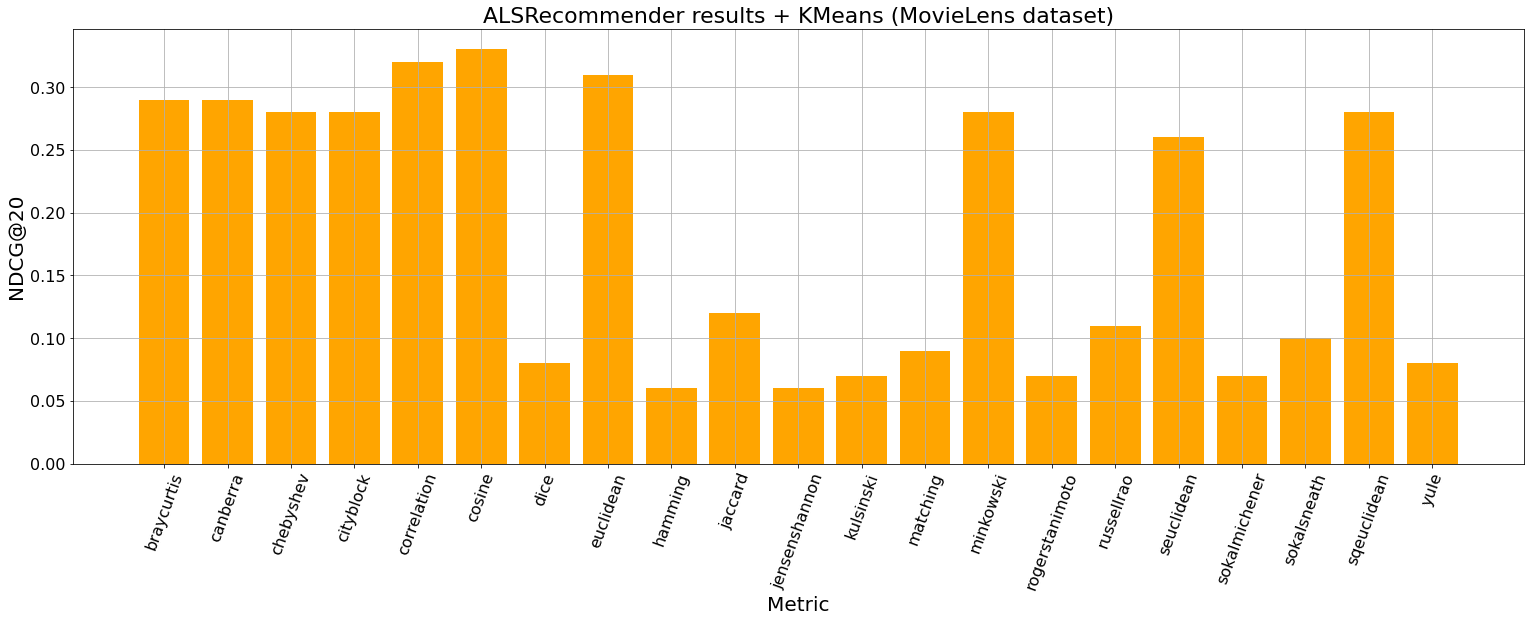

In [315]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender results + KMeans (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), n20, color='orange')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('n20_all_metrics_k.png', bbox_inches = 'tight')
plt.show()

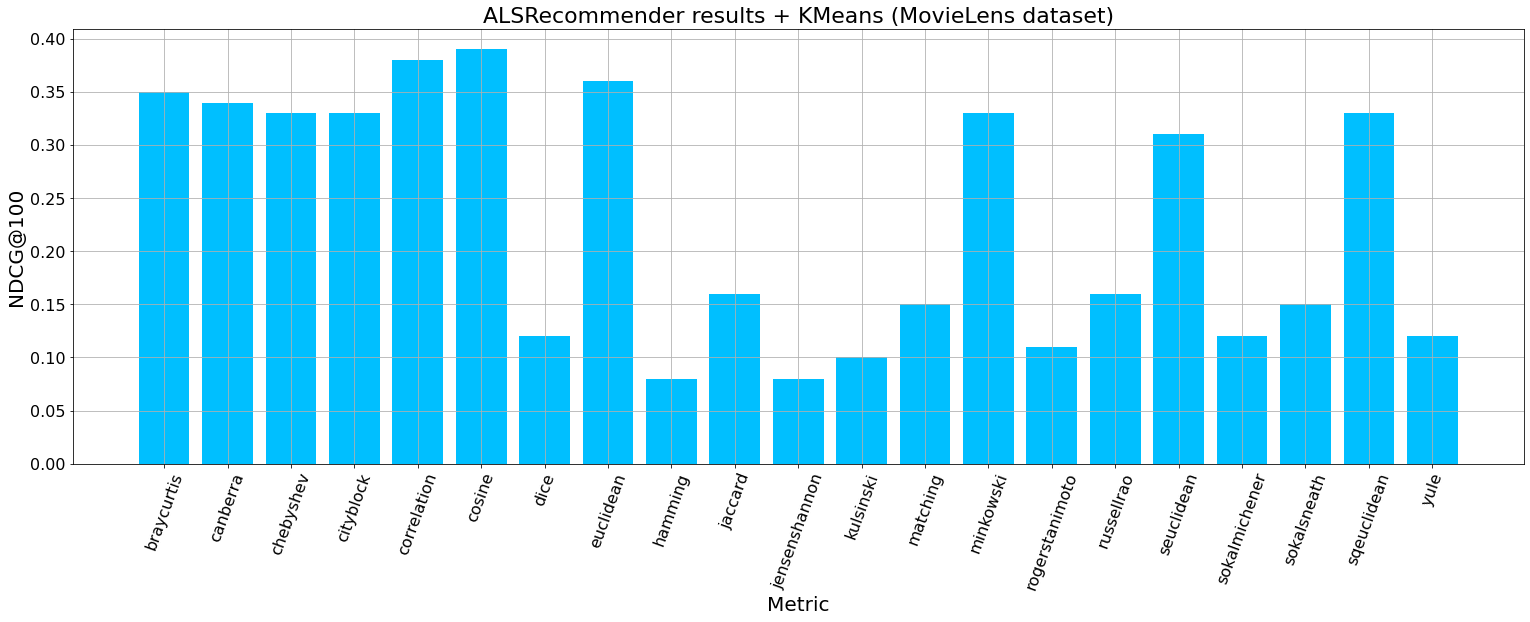

In [316]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender results + KMeans (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), n100, color='deepskyblue')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('n100_all_metrics_k.png', bbox_inches = 'tight')
plt.show()

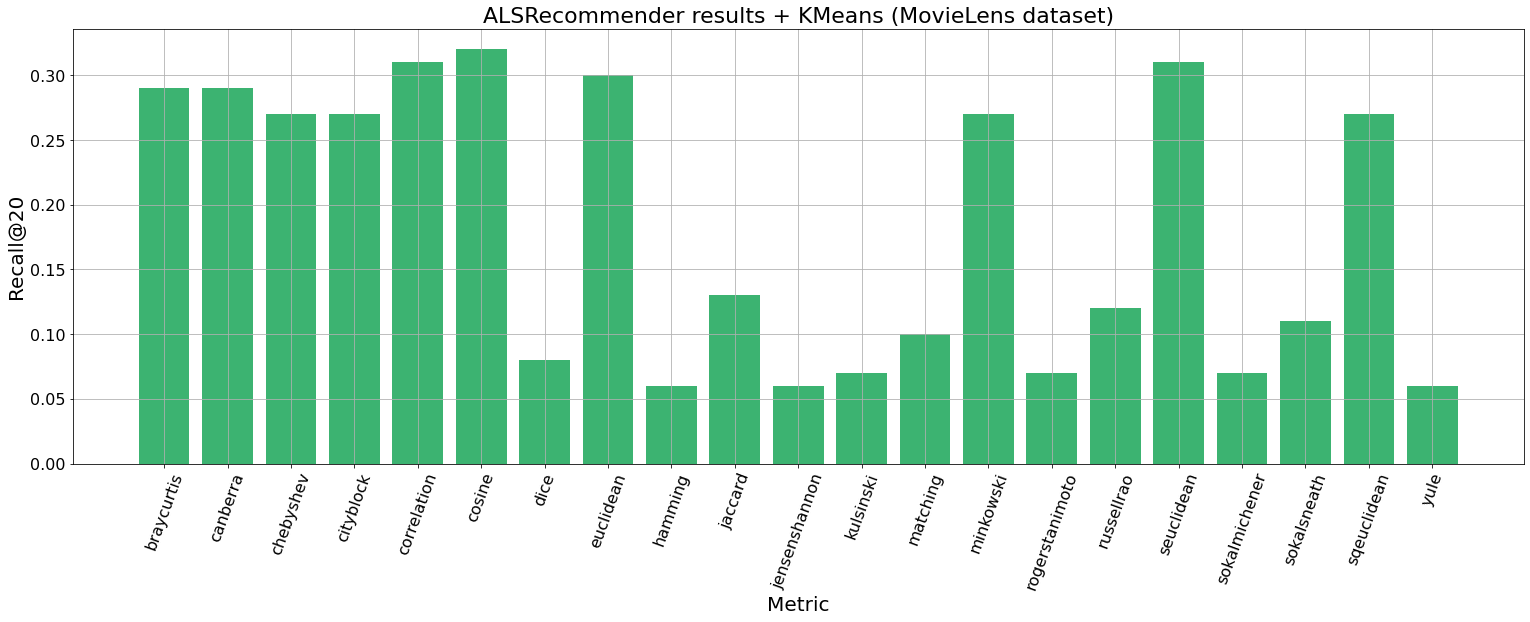

In [317]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender results + KMeans (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), r20, color='mediumseagreen')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('r20_all_metrics_k.png', bbox_inches = 'tight')
plt.show()

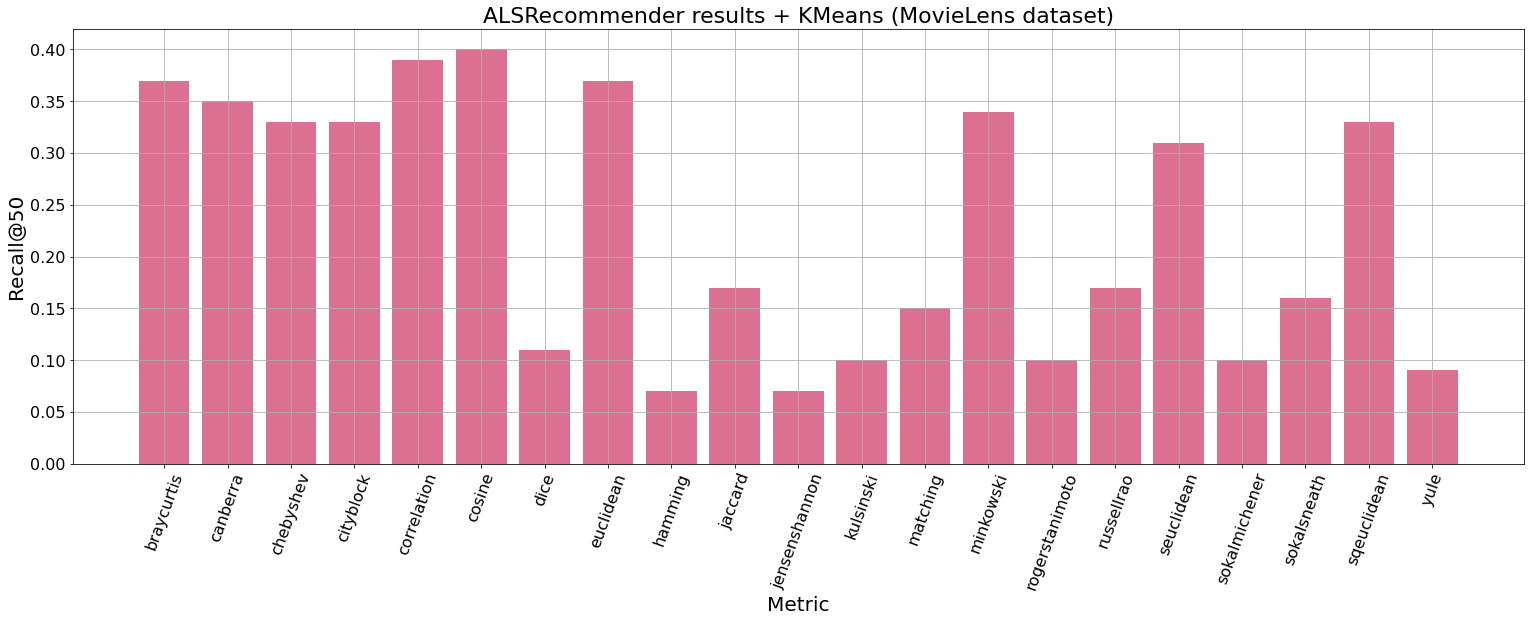

In [318]:
plt.figure(figsize=(26, 8))
plt.xlabel('Metric', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender results + KMeans (MovieLens dataset)', size=22)
plt.bar(np.arange(len(sim)), r50, color='palevioletred')
plt.xticks(np.arange(len(sim)), sim, fontsize=16, rotation=70)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('r50_all_metrics_k.png', bbox_inches = 'tight')
plt.show()

In [ ]:
! PYTHONPATH=. python3 scripts/test_your_function_diff_metrics.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f3d6ddb46d0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f3d6ddb4990>}
  0% 0/10 [00:00<?, ?trial/s, best loss=?]/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "

Number of clasters:
8
  0%|          | 0/8 [00:00<?, ?it/s]

cosine
correlation
euclidean
cityblock
 12%|#2        | 1/8 [00:15<01:48, 15.52s/it]

cosine
correlation
euclidean
cityblock
 25%|##5       | 2/8 [00:30<01:32, 15.42s/it]



Побор числа кластеров

In [14]:
! PYTHONPATH=. python3 scripts/test_find_best_N.py --data=ml-1m --db_path=../results/

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
ml-1m
Number of clasters: 2
100%|█████████████████████████████████████████████| 8/8 [02:36<00:00, 19.57s/it]
0.4068530283098167
cosine
cosine
n_clusters: 2
Similarity function: cosine
| Func: OtherRecsALSRecommenderKNN| n20 0.3291 | n100 0.3927 | r20 0.3283 | r50 0.4059
Number of clasters: 4
100%|█████████████████████████████████████████████| 8/8 [02:35<00:00, 19.43s/it]
0.40640537114147696
cosine
cosine
n_clusters: 4
Similarity function: cosine
| Func: OtherRecsALSRecommenderKNN| n20 0.3314 | n100 0.3933 | r20 0.3297 | r50 0.4083
Number of clasters: 6
100%|█████████████████████████████████████████████| 8/8 [02:37<00:00, 19.73s/it]
0.39853369257758775
cosine
cosine
n_clusters: 6
Similarity function: cosine
| Func: OtherRecsALSRecommenderKNN| n2

In [18]:
n20 = [0.3290762170047725, 0.3314060134462898, 0.3292309811177876, 0.32800489291677754, 0.32500708825062236, 0.322039786659151, 0.32219619093144697, 0.316186261182285, 0.31208302505295044, 0.3163550606393474]
n100 = [0.3926661233480149, 0.3933126661820275, 0.3901668578808183, 0.3895160384457647, 0.38847668681285114, 0.384658367382295, 0.38669810955357936, 0.3777645982333603, 0.3781195228827271, 0.37543611935098586]
r20 = [0.32825310891379, 0.3297216815863874, 0.32506945919147934, 0.3252469056141657, 0.3198327572625173, 0.3187945368958527, 0.31885922965493396, 0.3130008256449433, 0.30826067208505287, 0.31354784428248045]
r50 = [0.40593949616643416, 0.40833254414365666, 0.40046668421697706, 0.3998121492493367, 0.3969135490067574, 0.3948824585708763, 0.39670548255418975, 0.38602758464860126, 0.3888518509224118, 0.3854707569449895]
n_clusters = np.arange(2, 22, 2)

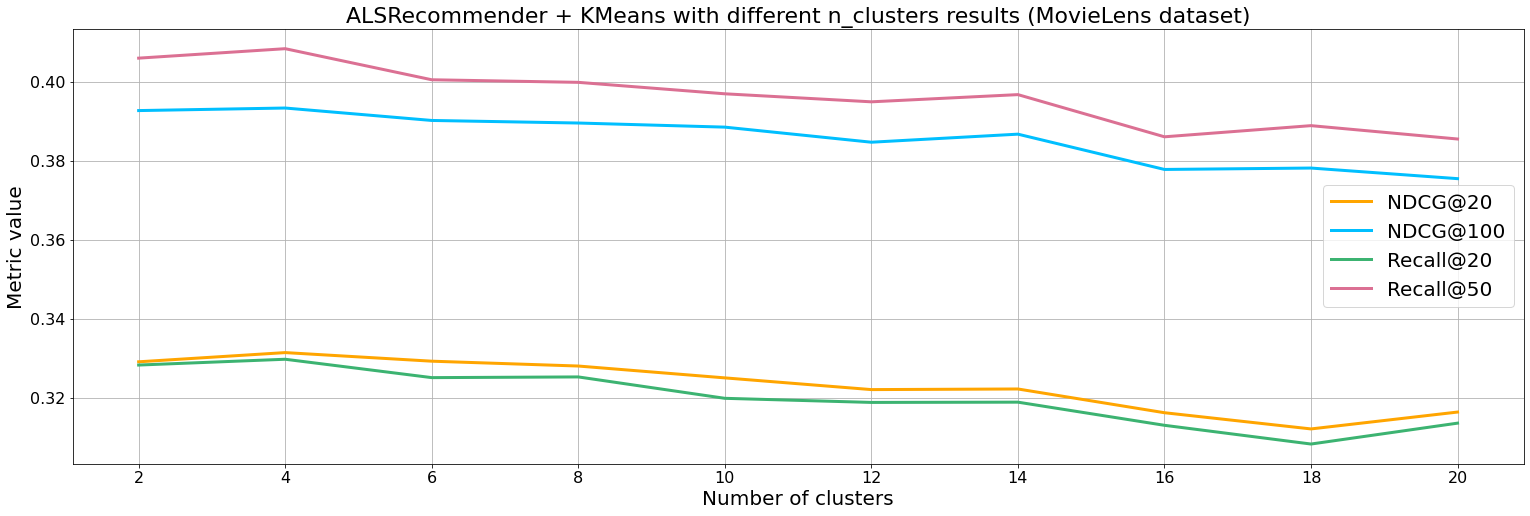

In [24]:
plt.figure(figsize=(26, 8))
plt.xlabel('Number of clusters', size=20)
plt.ylabel('Metric value', size=20) 
plt.title('ALSRecommender + KMeans with different n_clusters results (MovieLens dataset)', size=22)
plt.plot(n_clusters, n20, color='orange', linewidth=3, label='NDCG@20')
plt.plot(n_clusters, n100, color='deepskyblue', linewidth=3, label='NDCG@100')
plt.plot(n_clusters, r20, color='mediumseagreen', linewidth=3, label='Recall@20')
plt.plot(n_clusters, r50, color='palevioletred', linewidth=3, label='Recall@50')
plt.xticks(n_clusters, fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KMeans_all_metric.png', bbox_inches = 'tight')
plt.show()

Поиск ближайших соседей

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "
100% 4039/4039 [00:01<00:00, 2591.30it/s]
100% 8/8 [00:07<00:00,  1.12it/s]
0.38647661404785366
K_neighbors = angular
| Func: angular| n20 0.27 | n100 0.36 | r20 0.29 | r50 0.39
100% 4039/4039 [00:01<00:00, 2609.95it/s]
100% 8/8 [00:07<00:00,  1.11it/s]
0.27393795826131706
K_neighbors = euclidean
| Func: euclidean| n20 0.22 | n100 0.27 | r20 0.21 | r50 0.27
100% 4039/4039 [00:01<00:00, 2623.26it/s]
1

Подбор числа соседей

In [ ]:
! PYTHONPATH=. python3 scripts/test_find_best_metric.py --data=ml-1m --db_path=../results/

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",
/usr/local/lib/python3.7/dist-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "
100% 4039/4039 [02:11<00:00, 30.76it/s]
100% 8/8 [00:05<00:00,  1.55it/s]
0.36349040439924124
K_neighbors: 3
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.2273 | n100 0.3301 | r20 0.2546 | r50 0.3637
100% 4039/4039 [02:10<00:00, 30.83it/s]
100% 8/8 [00:05<00:00,  1.53it/s]
0.37782736936299494
K_neighbors: 4
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 

In [22]:
n20 = [0.2273258744443669, 0.25171740871412757, 0.266849912018505, 0.2759532029793227, 0.2836899448326061, 0.289369347340453, 0.29667971213660566, 0.30472152154059357, 0.3132342319995783, 0.31799955008973346, 0.32257350863815576, 0.32650780776221044, 0.3333356325320548, 0.33730235128467106, 0.3407706902991289, 0.3448670206421751, 0.3479263536051792, 0.351670648185757, 0.348092130016495, 0.34962346580390224, 0.35181227068574583, 0.35078264486507227, 0.3492206103407307, 0.34466820260527714, 0.34461142973820347]
n100 = [0.3300916485144728, 0.35058888905579805, 0.36528944449929174, 0.369068241219558, 0.3741020498927766, 0.37976119453452667, 0.3847445152539975, 0.38806124714112766, 0.3944191066550245, 0.3967340641955651, 0.40084389275039073, 0.40082660194166847, 0.4038257620036917, 0.40628117433022803, 0.4073656524190853, 0.4079407584568567, 0.408149018105469, 0.4087454237295535, 0.40621534996956066, 0.40565300296587187, 0.40512391262906716, 0.40351945187657784, 0.3996576921460411, 0.39565091021135346, 0.39500744339215865]
r20 = [0.2545903418348078, 0.2704726174367428, 0.28098466479341094, 0.29388657491459347, 0.3008479601409942, 0.3053714154524526, 0.3093527434940361, 0.32102458390852356, 0.322326994891933, 0.3285528899162413, 0.3286532964283738, 0.3331160079815265, 0.33545568307251744, 0.33846658573624516, 0.33891203936242636, 0.3436307040740477, 0.342028118871153, 0.34384638273663043, 0.339949833675956, 0.34173706017494715, 0.3409403930993327, 0.33792581176133807, 0.3357958011888352, 0.3332092165918017, 0.32975634948556776]
r50 = [0.3637029836564283, 0.374215049590986, 0.3856163184662161, 0.3912232787439264, 0.3944325026689573, 0.39655254462356393, 0.4033990625645353, 0.40483758185239943, 0.40928172059889795, 0.41493018462870596, 0.41439307982333007, 0.4141836012940439, 0.4137039397570319, 0.4130720181656413, 0.4121651224816771, 0.4146493343416275, 0.4135856491558142, 0.4126116377509137, 0.41055958913900226, 0.4082597355132579, 0.4054520678908457, 0.40234392027579824, 0.4019871085679506, 0.39798856983139297, 0.39295796214644335]
K = np.logspace(0.6, 2.2, num=25, dtype=int)

In [23]:
print(max(n20), max(n100), max(r20), max(r50))

0.35181227068574583 0.4087454237295535 0.34384638273663043 0.41493018462870596


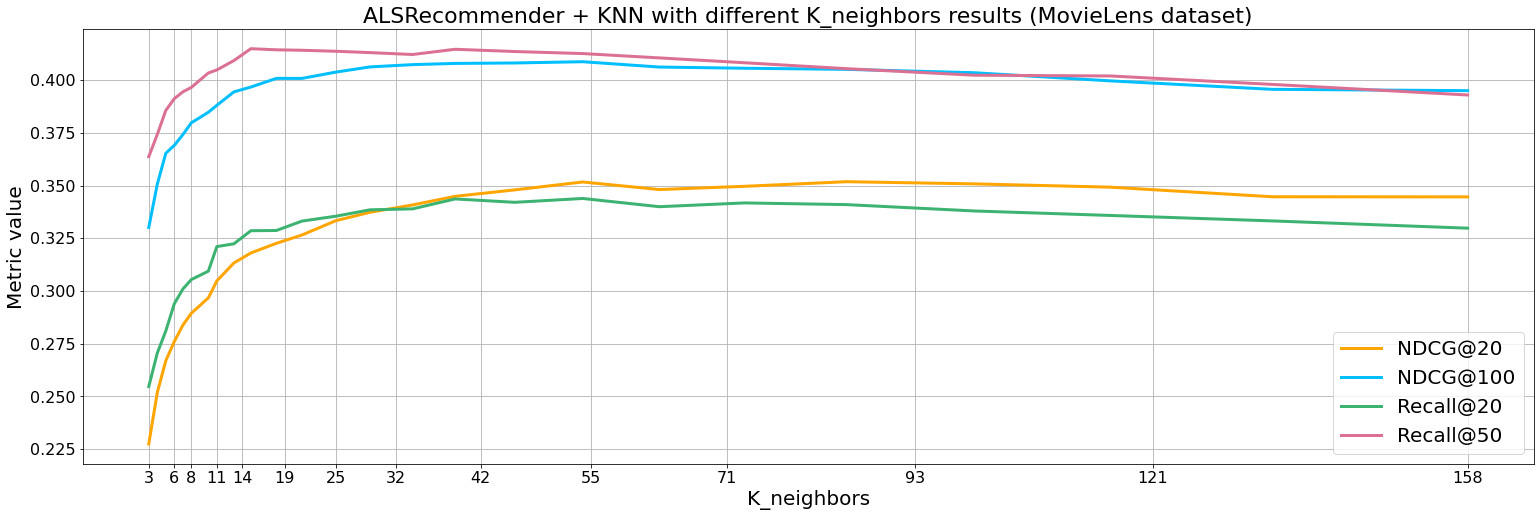

In [24]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Metric value', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (MovieLens dataset)', size=22)
plt.plot(K, n20, color='orange', linewidth=3, label='NDCG@20')
plt.plot(K, n100, color='deepskyblue', linewidth=3, label='NDCG@100')
plt.plot(K, r20, color='mediumseagreen', linewidth=3, label='Recall@20')
plt.plot(K, r50, color='palevioletred', linewidth=3, label='Recall@50')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_alll_m.png', bbox_inches = 'tight')
plt.show()

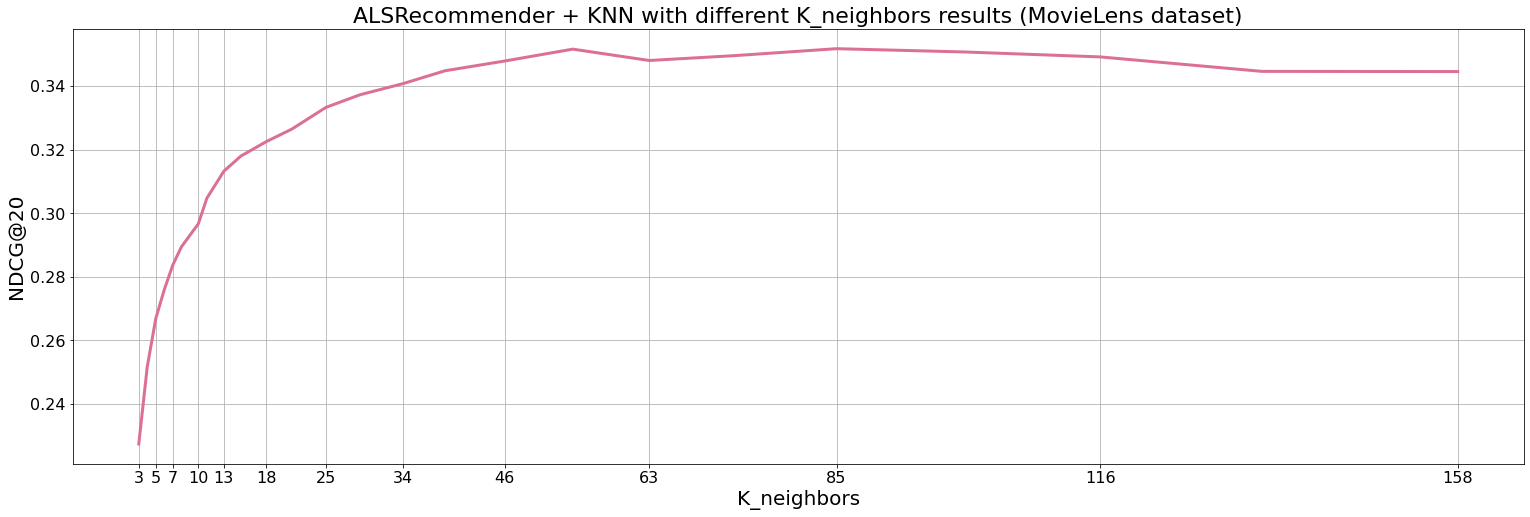

In [109]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (MovieLens dataset)', size=22)
plt.plot(K, n20, color='palevioletred', linewidth=3)
plt.xticks(K[::2], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n20_m.png')
plt.show()

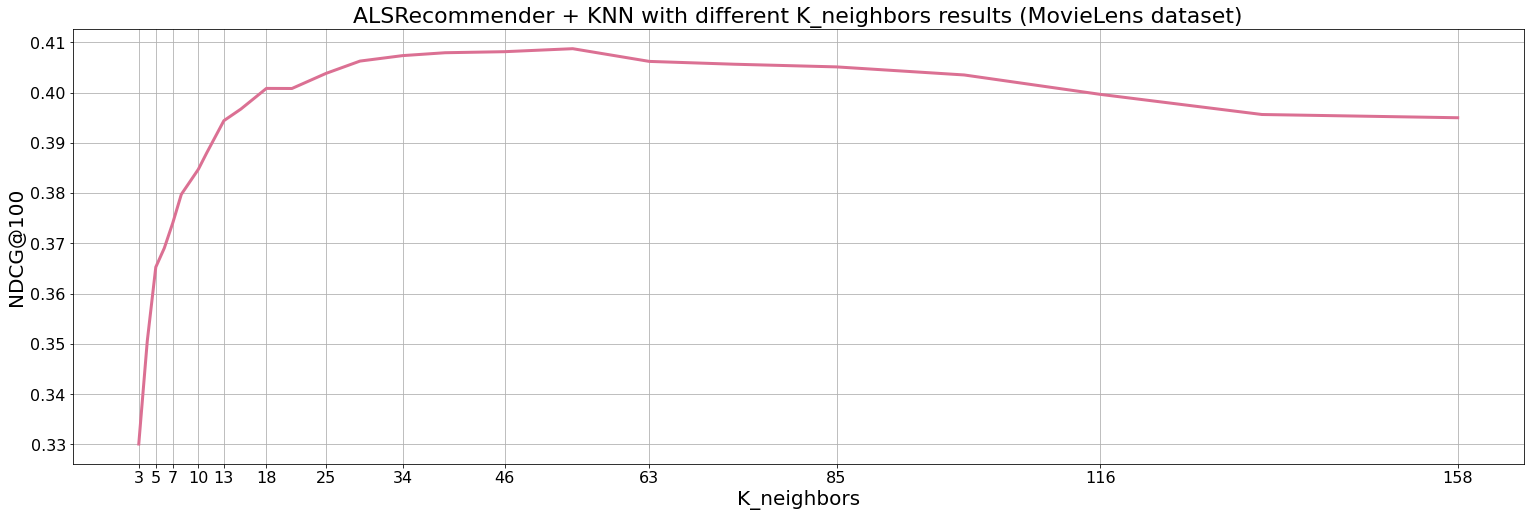

In [110]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (MovieLens dataset)', size=22)
plt.plot(K, n100, color='palevioletred', linewidth=3)
plt.xticks(K[::2], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n100_m.png')
plt.show()

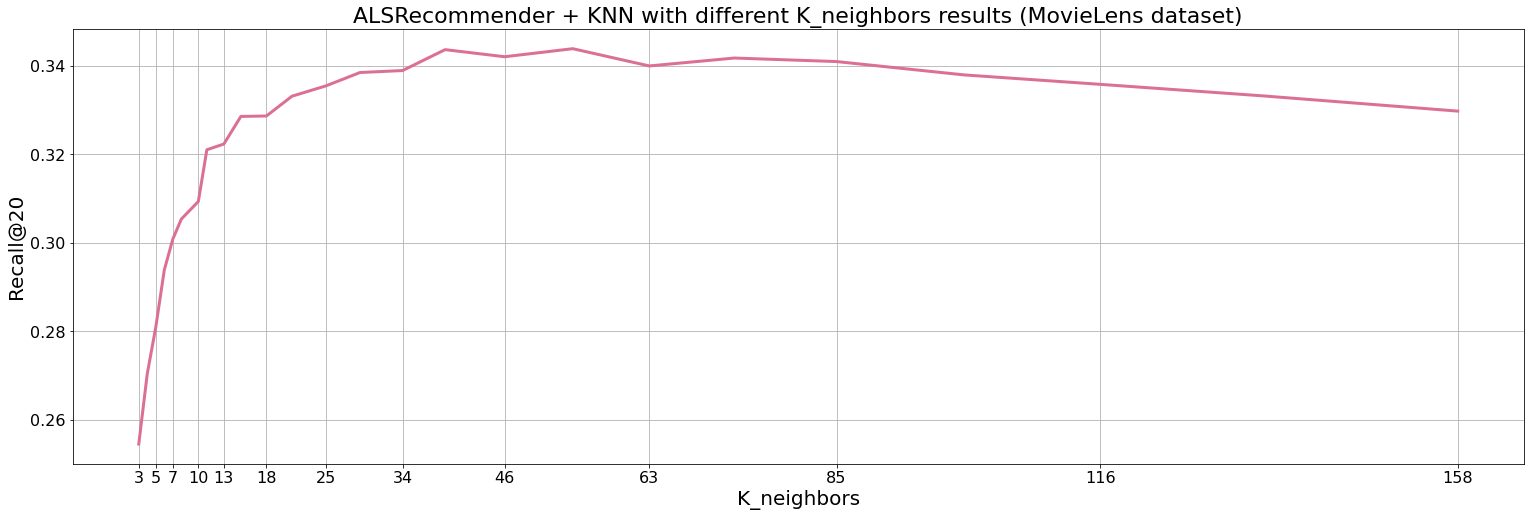

In [111]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (MovieLens dataset)', size=22)
plt.plot(K, r20, color='palevioletred', linewidth=3)
plt.xticks(K[::2], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r20_m.png')
plt.show()

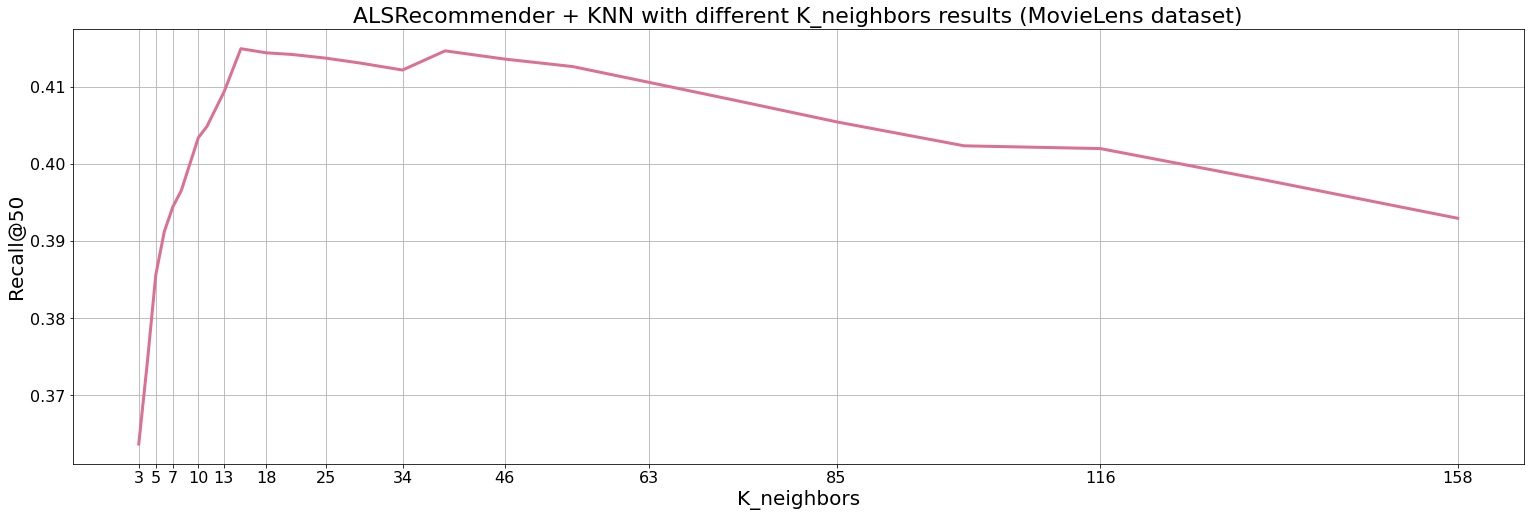

In [112]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (MovieLens dataset)', size=22)
plt.plot(K, r50, color='palevioletred', linewidth=3)
plt.xticks(K[::2], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r50_m.png')
plt.show()

In [ ]:
! PYTHONPATH=. python3  scripts/get_report.py --db_path=../results/

['ndcg_20', 'ndcg_100', 'recall_20', 'recall_50']


In [8]:
#amazon-book
! PYTHONPATH=. python scripts/test_find_best_metric.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
11111
OK
OK2
22222
100%|█████████████████████████████████████████████| 4/4 [02:23<00:00, 35.88s/it]
0.06621282481689567
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0380 | n100 0.0597 | r20 0.0411 | r50 0.0662
100%|█████████████████████████████████████████████| 4/4 [02:01<00:00, 30.43s/it]
0.04020629514165037
K_neighbors: 5
Similarity function: euclidean
| Func: OtherRecsALSRecommenderKNN| n20 0.0221 | n100 0.0362 | r20 0.0238 | r50 0.0402
100%|█████████████████████████████████████████████| 4/4 [02:06<00:00, 31.70s/it]
0.04150132645185744
K_neighbors: 5
Similarity function: manhattan
| Func: OtherRecsALSRecommenderKNN| n20 0.0207 | n100 0.0346 | r20 0.0243 | r50 0.0415
100%|██████████████████████████████

In [15]:
#gowalla
! PYTHONPATH=. python scripts/test_find_best_metric.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:51<00:00, 12.96s/it]
0.18820042369605572
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1101 | n100 0.1572 | r20 0.1220 | r50 0.1882
100%|█████████████████████████████████████████████| 4/4 [00:52<00:00, 13.02s/it]
0.08615377383835308
K_neighbors: 5
Similarity function: euclidean
| Func: OtherRecsALSRecommenderKNN| n20 0.0594 | n100 0.0816 | r20 0.0587 | r50 0.0862
100%|█████████████████████████████████████████████| 4/4 [00:49<00:00, 12.27s/it]
0.08970457632394918
K_neighbors: 5
Similarity function: manhattan
| Func: OtherRecsALSRecommenderKNN| n20 0.0561 | n100 0.0783 | r20 0.0558 | r50 0.0897
100%|█████████████████████████████████████████████| 4/

In [16]:
#yelp2018
! PYTHONPATH=. python scripts/test_find_best_metric.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:41<00:00, 10.44s/it]
0.10394735432052185
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0422 | n100 0.0792 | r20 0.0549 | r50 0.1039
100%|█████████████████████████████████████████████| 4/4 [00:41<00:00, 10.26s/it]
0.07879625564424403
K_neighbors: 5
Similarity function: euclidean
| Func: OtherRecsALSRecommenderKNN| n20 0.0328 | n100 0.0617 | r20 0.0433 | r50 0.0788
100%|█████████████████████████████████████████████| 4/4 [00:39<00:00,  9.96s/it]
0.07776884243510694
K_neighbors: 5
Similarity function: manhattan
| Func: OtherRecsALSRecommenderKNN| n20 0.0350 | n100 0.0627 | r20 0.0438 | r50 0.0778
100%|█████████████████████████████████████████████| 4/

In [239]:
#amazon-book
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f1ea366c400>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f1ea366c430>, 'similarity': <hyperopt.pyll.base.Apply object at 0x7f1ea3666f70>}
  0%|          | 0/4 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

 25%|##5       | 1/4 [01:47<05:23, 107.92s/it]

 50%|#####     | 2/4 [03:40<03:41, 110.73s/it]

 75%|#######5  | 3/4 [05:33<01:51, 111.80s/it]

100%|##########| 4/4 [07:04<00:00, 103.43s/it]

100%|##########| 4/4 [07:04<00:00, 106.07s/it]
0.06243195853012792                                                             
  0%|          | 0/4 [00:00<?, ?it/s]21s/trial, best loss: -0.06243195853012792]

 25%|##5       | 1/4 [01:12<03:38, 72.78s/it]

 50%|#####     | 2/4 [02:23<0

In [267]:
#amazon-book
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'l2_norm': <hyperopt.pyll.base.Apply object at 0x7f171fb66e50>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")

| epoch   1 |   10/  32 batches | ms/batch 3898.87 | loss 1052.75               
| epoch   1 |   20/  32 batches | ms/batch 3571.63 | loss 886.97                
| epoch   1 |   30/  32 batches | ms/batch 3586.80 | loss 1034.07               
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 117.56s | valid loss 0.00 | n20 

In [20]:
#amazon-book
! PYTHONPATH=. python scripts/test_find_best_k.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 5/5 [01:45<00:00, 21.04s/it]
0.06873173033613557
K_neighbors: 3
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0368 | n100 0.0580 | r20 0.0412 | r50 0.0687
100%|█████████████████████████████████████████████| 5/5 [01:48<00:00, 21.69s/it]
0.06778476414729784
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0361 | n100 0.0610 | r20 0.0408 | r50 0.0678
 84%|████████████████████████████████▋      | 3306/3943 [19:54<03:39,  2.90it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|█████████████████████████████████████████████| 5/5 [01:53<00:00, 22.74s/it]
0.07031968121077171
K_neighbors: 8
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0400 | n100 0.0645 | r20 0.0447 | r50 0.0703
 64%|████████████████████████▊              | 2511/3943 [15:36<09:40,  2.47it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|█████████████████████████████████████████████| 5/5 [02:04<00:00, 24.86s/it]
0.07229119902727761
K_neighbors: 14
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0407 | n100 0.0666 | r20 0.0434 | r50 0.0723
 49%|███████████████████▏                   | 1941/3943 [11:59<13:05,  2.55it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|█████████████████████████████████████████████| 5/5 [02:41<00:00, 32.37s/it]
0.0706255010938743
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0381 | n100 0.0643 | r20 0.0420 | r50 0.0706
 27%|██████████▋                            | 1082/3943 [07:22<18:08,  2.63it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|█████████████████████████████████████████████| 5/5 [03:25<00:00, 41.12s/it]
0.0719511622305256
K_neighbors: 42
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0374 | n100 0.0632 | r20 0.0411 | r50 0.0720
 15%|█████▊                                  | 576/3943 [04:10<25:19,  2.22it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 87%|█████████████████████████████████▊     | 3413/3943 [22:22<03:29,  2.53it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|█████████████████████████████████████████████| 5/5 [04:05<00:00, 49.16s/it]
0.06695129616700078
K_neighbors: 93
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0355 | n100 0.0602 | r20 0.0387 | r50 0.0670
100%|█████████████████████████████████████████████| 5/5 [04:22<00:00, 52.53s/it]
0.06366687316414593
K_neighbors: 121
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0315 | n100 0.0564 | r20 0.0348 | r50 0.0637
100%|█████████████████████████████████████████████| 5/5 [07:08<00:00, 85.67s/it]
0.059767922658302435
K_neighbors: 158
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0308 | n100 0.0529 | r20 0.0374 | r50 0.0598
n20: [0.03684226437328258, 0.03607800712777516, 0.03878489815298244, 0.04001830550642643, 0.037964569282047146, 0.040739612709690946, 0.03844185107832777, 0.03814031311762886, 0.03790710286964872, 0.0373543116119364, 0.03563970880756722, 0.033989076031606946, 0.03546698873533755, 0.031513416439411

In [19]:
n20 = [0.03684226437328258, 0.03607800712777516, 0.03878489815298244, 0.04001830550642643, 0.037964569282047146, 0.040739612709690946, 0.03844185107832777, 0.03814031311762886, 0.03790710286964872, 0.0373543116119364, 0.03563970880756722, 0.033989076031606946, 0.03546698873533755, 0.03151341643941101, 0.030774838377708644]
n100 = [0.058047536116155755, 0.061023719153560786, 0.06171596660315803, 0.06446286481096303, 0.06421823501818456, 0.06659836765571775, 0.06248814140674241, 0.06426705500329698, 0.06348648687379481, 0.06315943898949881, 0.06144168897214109, 0.05949921639710869, 0.06016714539483239, 0.05644341766933364, 0.052858491265548604]
r20 = [0.04124980768609767, 0.040763439872149324, 0.04368318640038374, 0.044655095797298074, 0.041282315587891937, 0.043398464960480276, 0.042570095415832614, 0.042005865427037825, 0.042132403574412426, 0.041139492921400324, 0.04185029450006305, 0.0379254029517367, 0.03874624922458339, 0.034793831106431784, 0.03735400733682078]
r50 = [0.06873173033613557, 0.06778476414729784, 0.06897862492672126, 0.07031968121077171, 0.07257218527397638, 0.07229119902727761, 0.06962382399308992, 0.0706255010938743, 0.07037298114290046, 0.0719511622305256, 0.06926125506596438, 0.06676708698780089, 0.06695129616700078, 0.06366687316414593, 0.059767922658302435]
K = np.logspace(0.6, 2.2, num=15, dtype=int)

In [20]:
print(max(n20), max(n100), max(r20), max(r50))

0.040739612709690946 0.06659836765571775 0.044655095797298074 0.07257218527397638


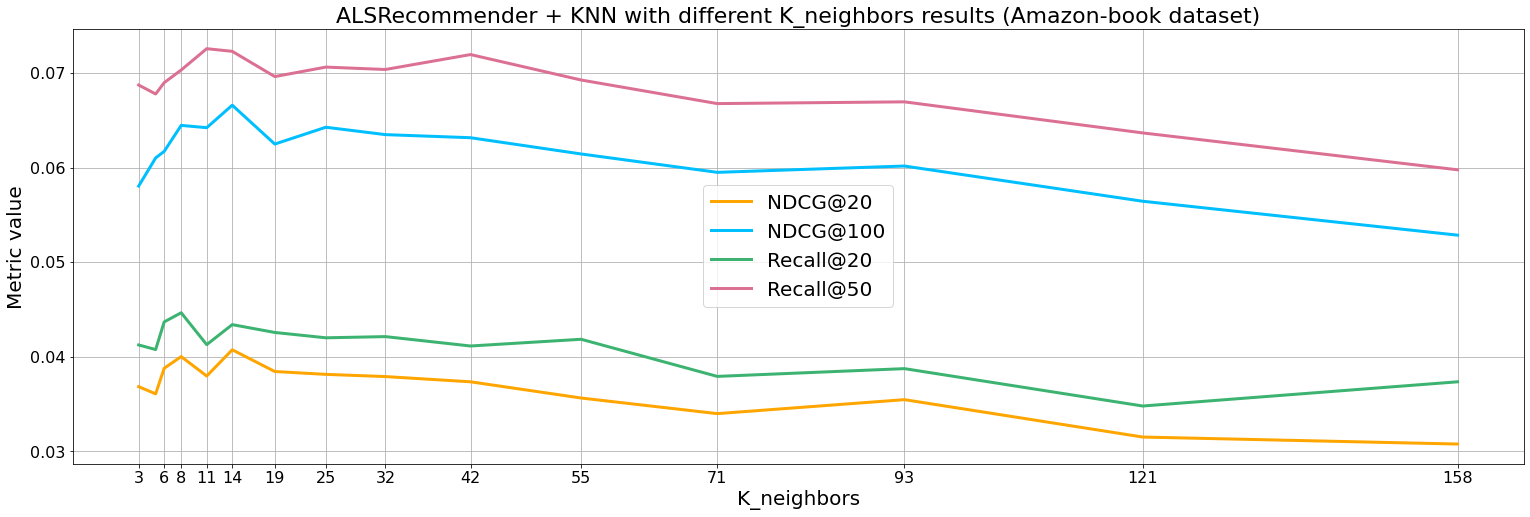

In [21]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Metric value', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Amazon-book dataset)', size=22)
plt.plot(K, n20, color='orange', linewidth=3, label='NDCG@20')
plt.plot(K, n100, color='deepskyblue', linewidth=3, label='NDCG@100')
plt.plot(K, r20, color='mediumseagreen', linewidth=3, label='Recall@20')
plt.plot(K, r50, color='palevioletred', linewidth=3, label='Recall@50')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_alll_a.png', bbox_inches = 'tight')
plt.show()

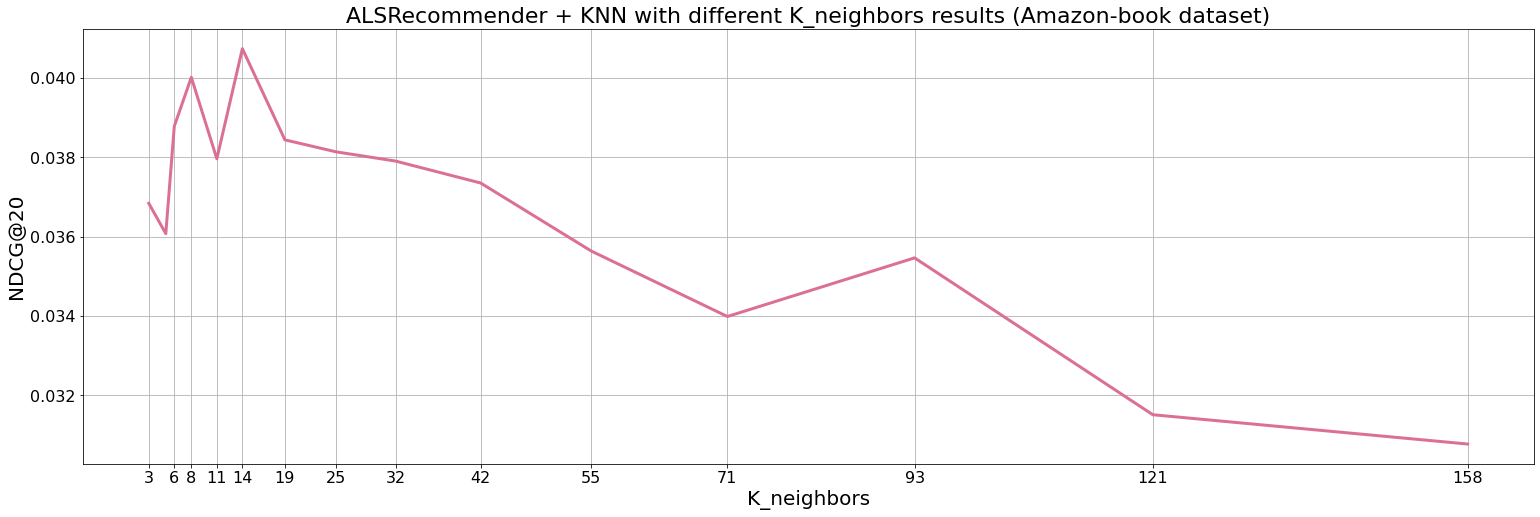

In [158]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Amazon-book dataset)', size=22)
plt.plot(K, n20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n20_a.png')
plt.show()

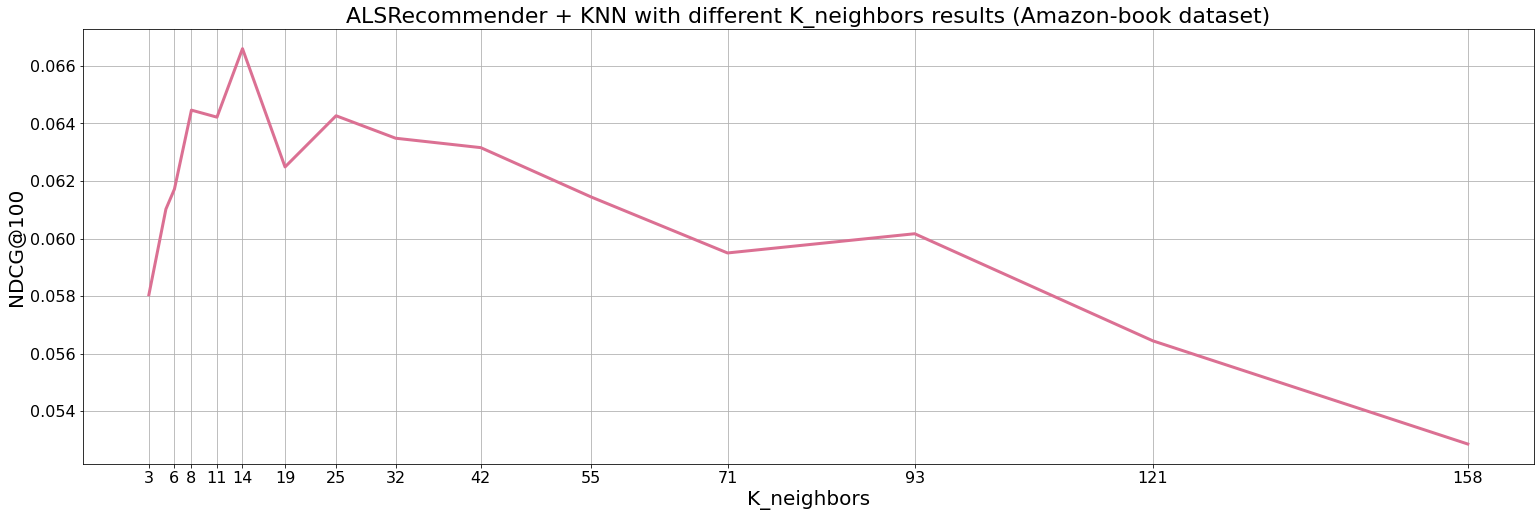

In [135]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Amazon-book dataset)', size=22)
plt.plot(K, n100, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n100_a.png')
plt.show()

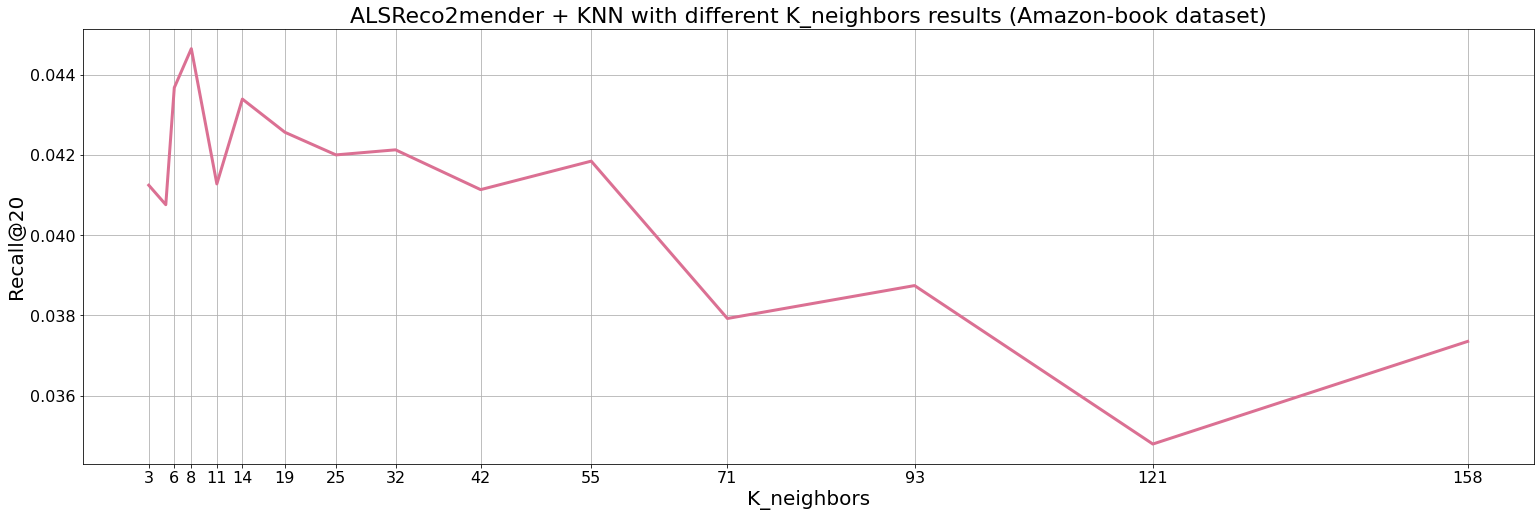

In [140]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSReco2mender + KNN with different K_neighbors results (Amazon-book dataset)', size=22)
plt.plot(K, r20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r20_a.png')
plt.show()

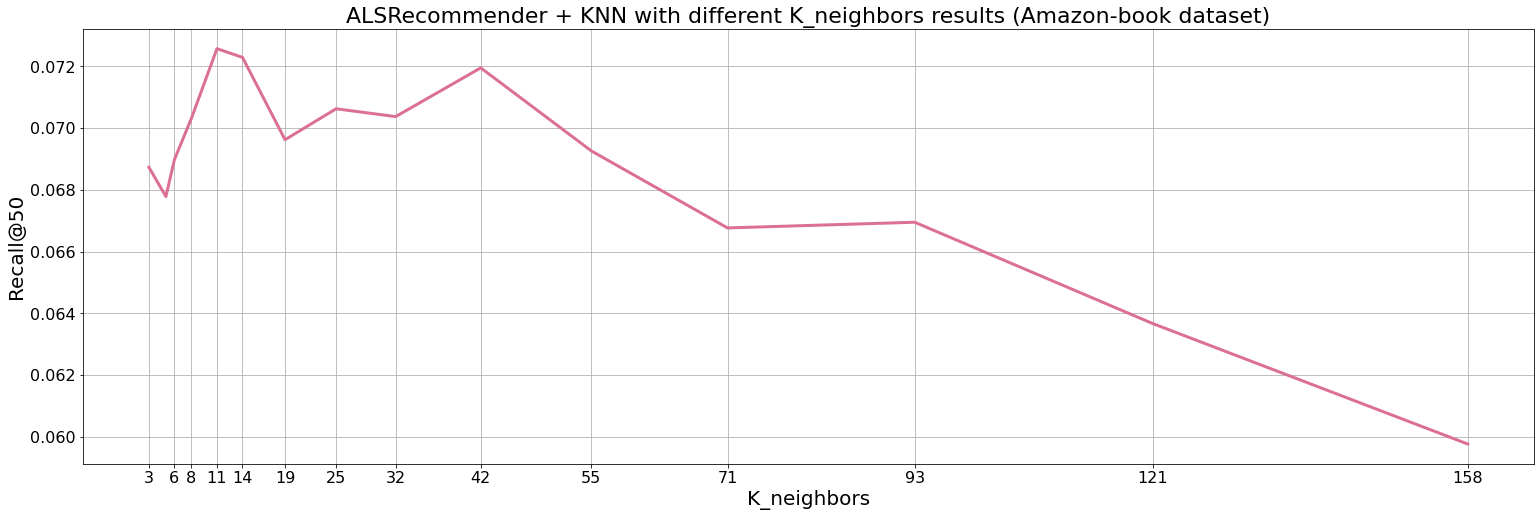

In [117]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Amazon-book dataset)', size=22)
plt.plot(K, r50, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r50_a.png')
plt.show()

In [240]:
#gowalla
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f7cd93503d0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f7cd93503a0>, 'similarity': <hyperopt.pyll.base.Apply object at 0x7f7cd934af70>}
  0%|          | 0/5 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

 20%|##        | 1/5 [00:40<02:41, 40.45s/it]

 40%|####      | 2/5 [01:20<02:01, 40.43s/it]

 60%|######    | 3/5 [02:01<01:20, 40.43s/it]

 80%|########  | 4/5 [02:41<00:40, 40.50s/it]

100%|##########| 5/5 [02:43<00:00, 26.47s/it]

100%|##########| 5/5 [02:43<00:00, 32.70s/it]
0.18566852486907215                                                             
  0%|          | 0/5 [00:00<?, ?it/s]75s/trial, best loss: -0.18566852486907215]

 20%|##        | 1/5 [00:40<02:41,

In [264]:
#gowalla
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'l2_norm': <hyperopt.pyll.base.Apply object at 0x7ff7fb1bde50>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")

| epoch   1 |   10/  32 batches | ms/batch 1939.37 | loss 583.16                
| epoch   1 |   20/  32 batches | ms/batch 1700.46 | loss 555.99                
| epoch   1 |   30/  32 batches | ms/batch 1691.88 | loss 583.33                
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 57.20s | valid loss 0.00 | n20 0

In [21]:
#gowalla
! PYTHONPATH=. python scripts/test_find_best_k.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:47<00:00, 11.96s/it]
0.18302143238600133
K_neighbors: 3
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1109 | n100 0.1562 | r20 0.1225 | r50 0.1830
100%|█████████████████████████████████████████████| 4/4 [00:47<00:00, 11.98s/it]
0.19015697418560165
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1147 | n100 0.1589 | r20 0.1275 | r50 0.1902
100%|█████████████████████████████████████████████| 4/4 [00:48<00:00, 12.14s/it]
0.18597455686205078
K_neighbors: 6
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1146 | n100 0.1603 | r20 0.1276 | r50 0.1860
100%|█████████████████████████████████████████████| 4/4 [0

In [16]:
n20 = [0.11091029349042662, 0.11466288847929648, 0.1145875215781529, 0.11570065844559661, 0.11455529011001765, 0.11521696812485308, 0.11503293236959518, 0.10990042648089429, 0.10649330639583014, 0.10463701440437055, 0.10083071300039882, 0.09639183794691941, 0.09406800320849971, 0.08874599083843267, 0.08270327711408586]
n100 = [0.15622371435877133, 0.15894320928967484, 0.1602613844284049, 0.15916044730569193, 0.16046892784903052, 0.16020708281450108, 0.158875927682807, 0.1548364316552239, 0.15147487749718802, 0.14518870904906978, 0.1397553211465905, 0.13546992894573734, 0.1297623198917383, 0.12032413405521372, 0.11256532653482505]
r20 = [0.12249542423221482, 0.12747043379999157, 0.12760615166652922, 0.12644070826980255, 0.1241437173384033, 0.12090218275057386, 0.12292683789256102, 0.11752117693148757, 0.11183324588526251, 0.11503027544958014, 0.106932161173829, 0.09795420778294461, 0.09494204081889551, 0.0908025167588005, 0.08621324252151925]
r50 = [0.18302143238600133, 0.19015697418560165, 0.18597455686205078, 0.18892107912733322, 0.18789992332540056, 0.18458720697090766, 0.18882615870606984, 0.18360928204976654, 0.1751657134638431, 0.16848049788514866, 0.15921209704704636, 0.14927075396737136, 0.14127589829300155, 0.1356757375367575, 0.1243641411661518]
K = np.logspace(0.6, 2.2, num=15, dtype=int)

In [17]:
print(max(n20), max(n100), max(r20), max(r50))

0.11570065844559661 0.16046892784903052 0.12760615166652922 0.19015697418560165


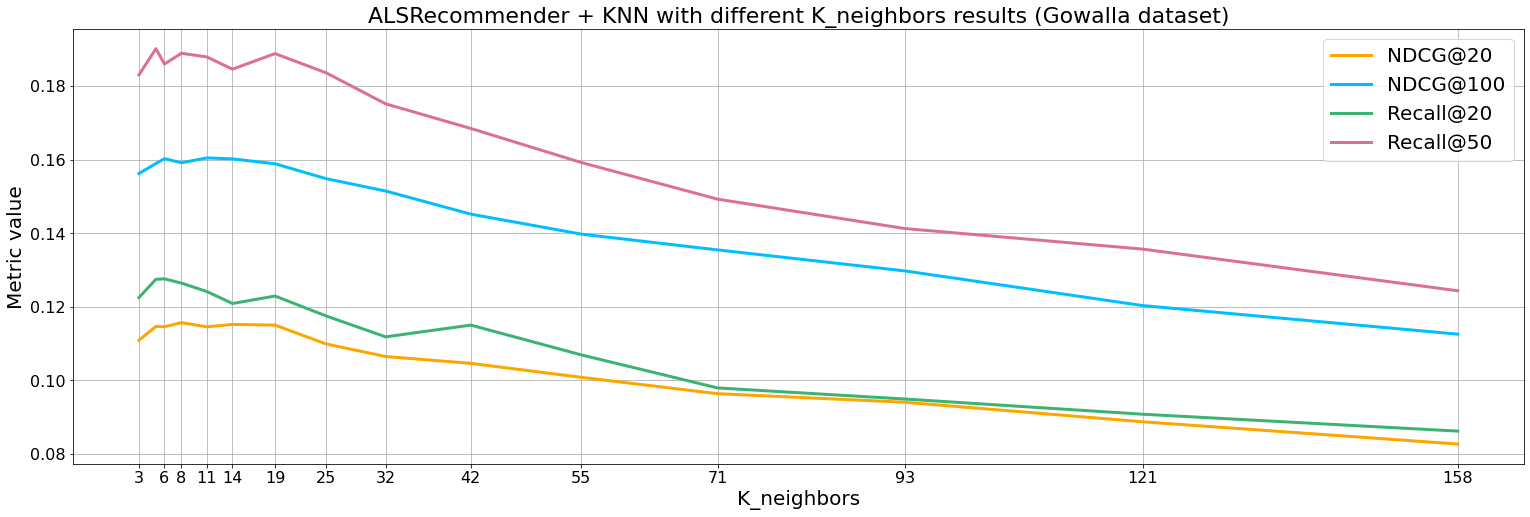

In [18]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Metric value', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Gowalla dataset)', size=22)
plt.plot(K, n20, color='orange', linewidth=3, label='NDCG@20')
plt.plot(K, n100, color='deepskyblue', linewidth=3, label='NDCG@100')
plt.plot(K, r20, color='mediumseagreen', linewidth=3, label='Recall@20')
plt.plot(K, r50, color='palevioletred', linewidth=3, label='Recall@50')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_alll_g.png', bbox_inches = 'tight')
plt.show()

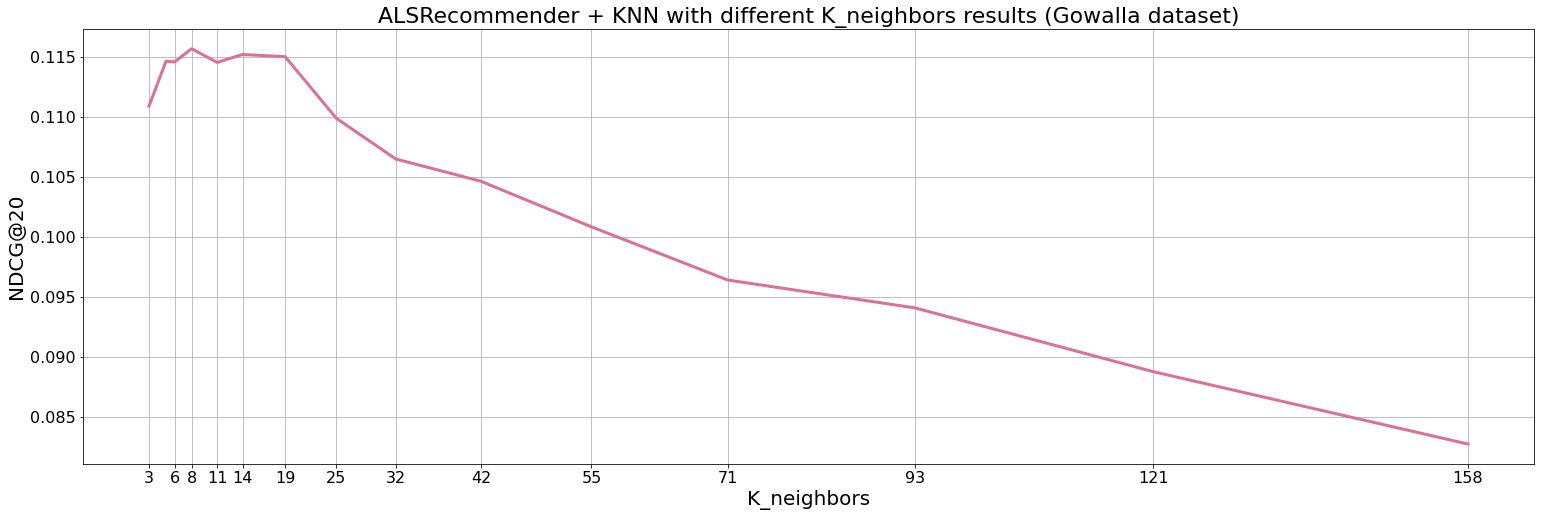

In [130]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Gowalla dataset)', size=22)
plt.plot(K, n20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n20_g.png')
plt.show()

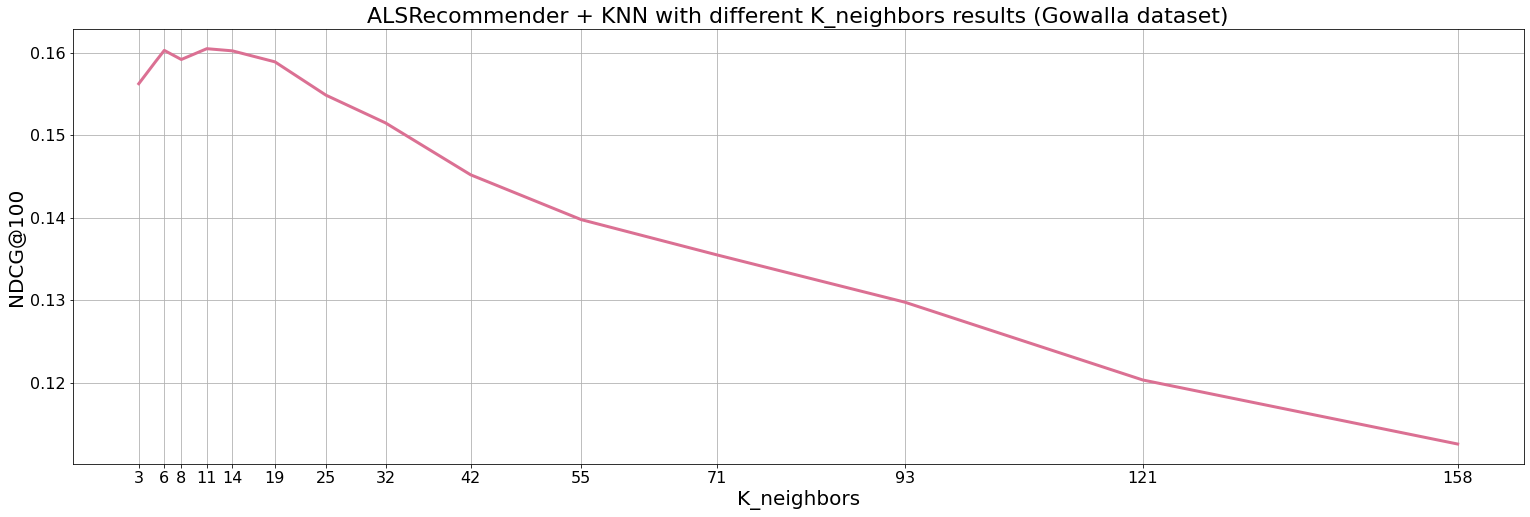

In [131]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Gowalla dataset)', size=22)
plt.plot(K, n100, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n100_g.png')
plt.show()

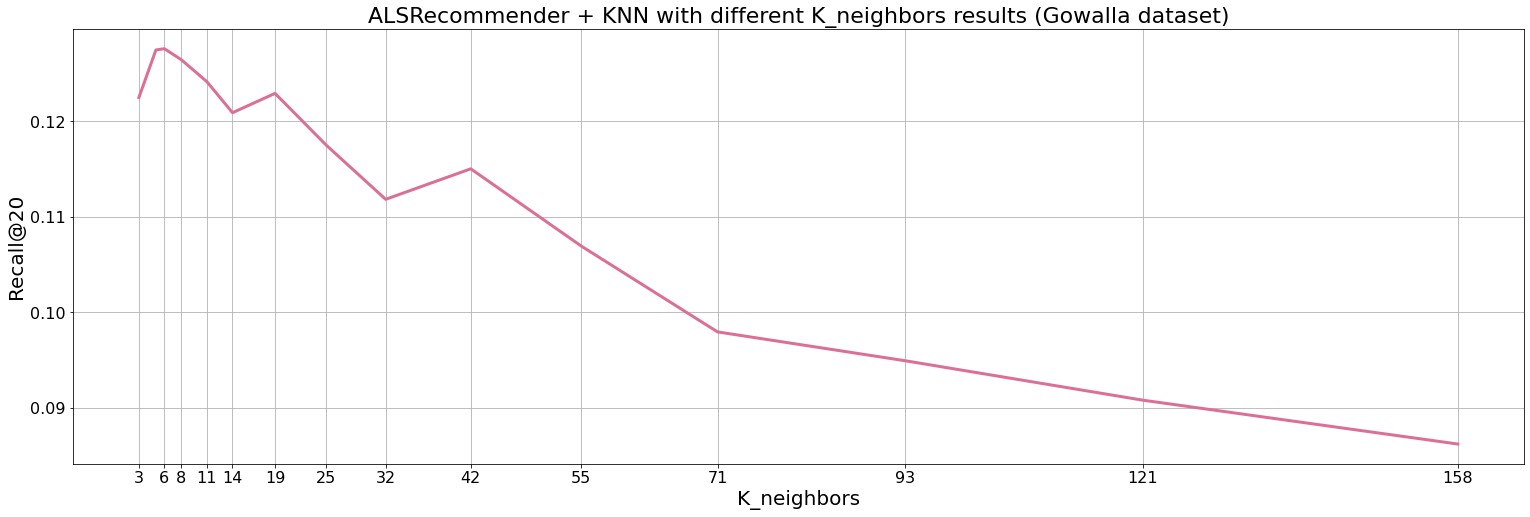

In [162]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Gowalla dataset)', size=22)
plt.plot(K, r20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r20_g.png')
plt.show()

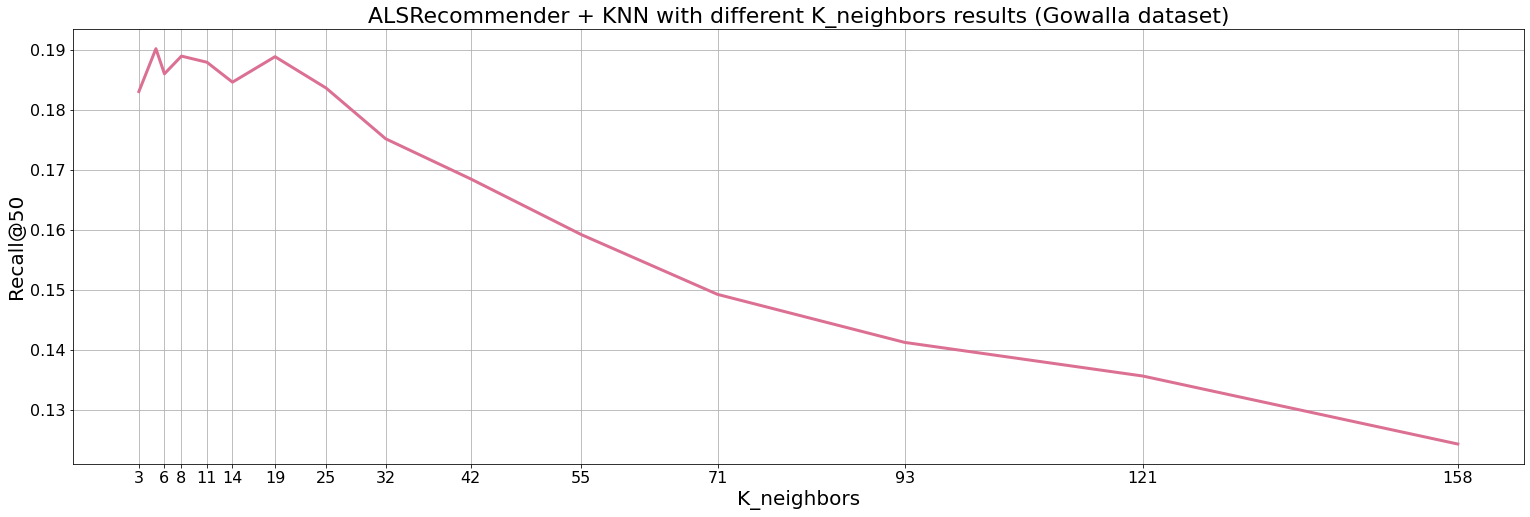

In [122]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (Gowalla dataset)', size=22)
plt.plot(K, r50, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r50_g.png')
plt.show()

In [241]:
#yelp2018
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'alpha': <hyperopt.pyll.base.Apply object at 0x7f177da523d0>, 'factors': <hyperopt.pyll.base.Apply object at 0x7f177da523a0>, 'similarity': <hyperopt.pyll.base.Apply object at 0x7f177da4bf70>}
  0%|          | 0/4 [00:00<?, ?it/s]    | 0/10 [00:00<?, ?trial/s, best loss=?]

 25%|##5       | 1/4 [00:40<02:00, 40.17s/it]

 50%|#####     | 2/4 [01:20<01:20, 40.22s/it]

 75%|#######5  | 3/4 [02:00<00:40, 40.28s/it]

100%|##########| 4/4 [02:30<00:00, 35.99s/it]

100%|##########| 4/4 [02:30<00:00, 37.55s/it]
0.08381842980351725                                                             
  0%|          | 0/4 [00:00<?, ?it/s]86s/trial, best loss: -0.08381842980351725]

 25%|##5       | 1/4 [00:27<01:23, 27.72s/it]

 50%|#####     | 2/4 [00:55<00:55,

In [263]:
#yelp2018
! PYTHONPATH=. python scripts/test_your_funstion_base.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'l2_norm': <hyperopt.pyll.base.Apply object at 0x7f9043f7de50>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")

| epoch   1 |   10/  32 batches | ms/batch 1428.68 | loss 723.50                
| epoch   1 |   20/  32 batches | ms/batch 1255.08 | loss 608.19                
| epoch   1 |   30/  32 batches | ms/batch 1276.54 | loss 627.94                
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 42.18s | valid loss 0.00 | n20 0

In [22]:
#yelp2018
! PYTHONPATH=. python scripts/test_find_best_k.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:49<00:00, 12.37s/it]
0.10698387051980837
K_neighbors: 3
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0503 | n100 0.0874 | r20 0.0606 | r50 0.1070
100%|█████████████████████████████████████████████| 4/4 [00:49<00:00, 12.32s/it]
0.10752254716520164
K_neighbors: 5
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0493 | n100 0.0880 | r20 0.0588 | r50 0.1075
100%|█████████████████████████████████████████████| 4/4 [00:47<00:00, 11.82s/it]
0.11247707887437465
K_neighbors: 6
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0507 | n100 0.0894 | r20 0.0604 | r50 0.1125
100%|█████████████████████████████████████████████| 4/4 [0

In [11]:
n20 = [0.05028171279176087, 0.0492513140911097, 0.05065130944888141, 0.053702767781217756, 0.0539666144703899, 0.05429304401029861, 0.052518340854405855, 0.056758026390024904, 0.056818056210850246, 0.05516457937969526, 0.0553915718378597, 0.054794494215178416, 0.05379979895462937, 0.051371465097008115, 0.05092455059383877]
n100 = [0.08743792540680613, 0.08795714138802094, 0.08942277638406834, 0.09136623616111213, 0.09021051877717341, 0.09145283969015246, 0.09044837483746784, 0.09073827917036685, 0.09087256876381318, 0.09077778038150104, 0.0909740817797132, 0.08970497363295162, 0.090112968646012, 0.08639444114690988, 0.08459997172958544]
r20 = [0.06059373972080189, 0.05878838733666036, 0.0604402035676349, 0.06405145897365631, 0.06562369979583664, 0.06536736136578235, 0.0634199315323173, 0.06921117602596659, 0.06774392221191392, 0.0662100622450114, 0.06626138888069871, 0.06643654678485951, 0.0634171862979323, 0.06205962696086907, 0.06296329816869348]
r50 = [0.10698387051980837, 0.10752254716520164, 0.11247707887437465, 0.11309555322041236, 0.10993989537476333, 0.10934411775438428, 0.11033937868706378, 0.11492903339989527, 0.11232226009488325, 0.1148009268149129, 0.11137784975615893, 0.11166249260829399, 0.10917273860193166, 0.1087281503049716, 0.1039237464714402]
K = np.logspace(0.6, 2.2, num=15, dtype=int)

In [12]:
print(max(n20), max(n100), max(r20), max(r50))

0.056818056210850246 0.09145283969015246 0.06921117602596659 0.11492903339989527


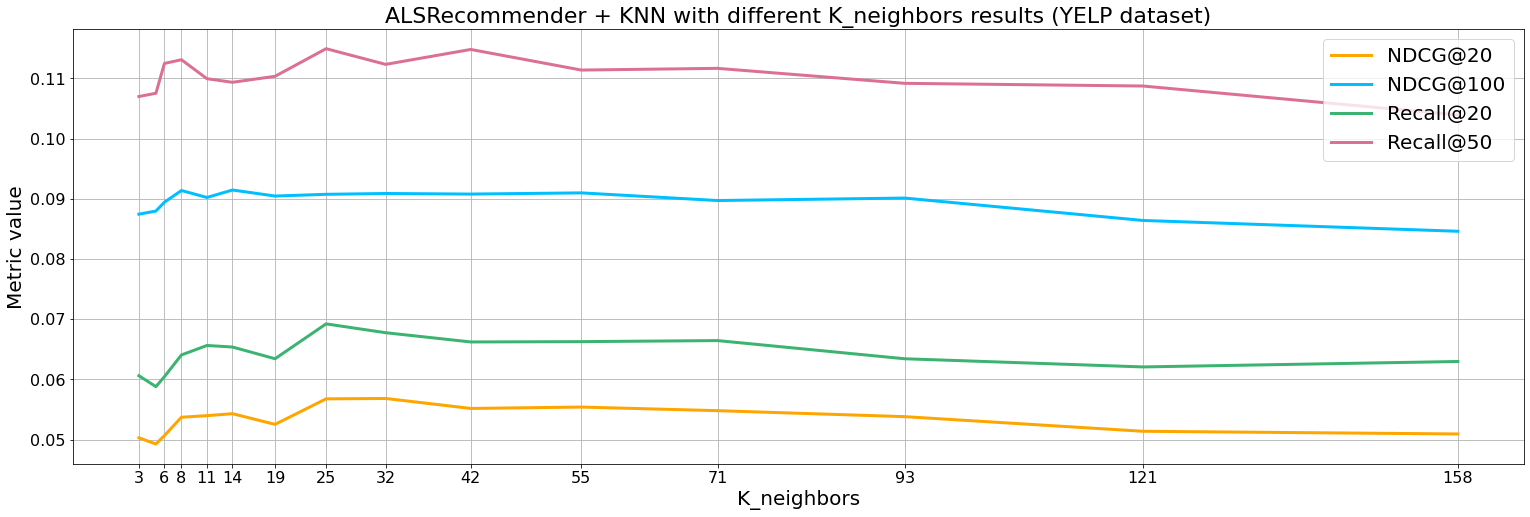

In [15]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Metric value', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (YELP dataset)', size=22)
plt.plot(K, n20, color='orange', linewidth=3, label='NDCG@20')
plt.plot(K, n100, color='deepskyblue', linewidth=3, label='NDCG@100')
plt.plot(K, r20, color='mediumseagreen', linewidth=3, label='Recall@20')
plt.plot(K, r50, color='palevioletred', linewidth=3, label='Recall@50')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_alll_y.png', bbox_inches = 'tight')
plt.show()

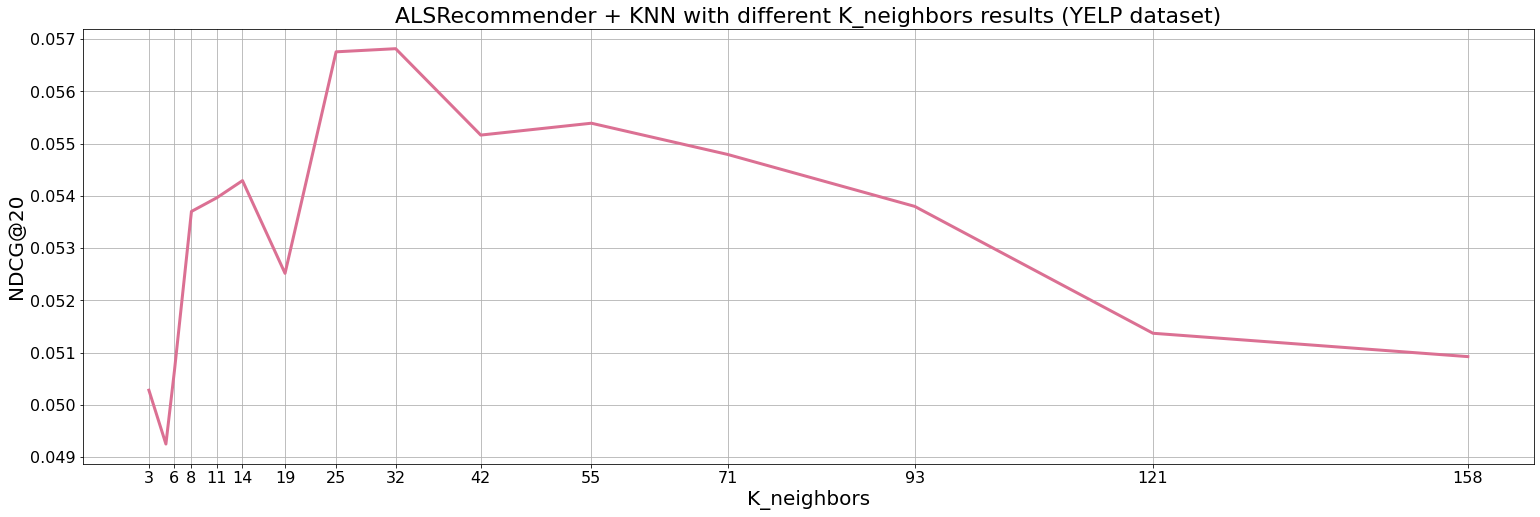

In [124]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (YELP dataset)', size=22)
plt.plot(K, n20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n20_y.png')
plt.show()

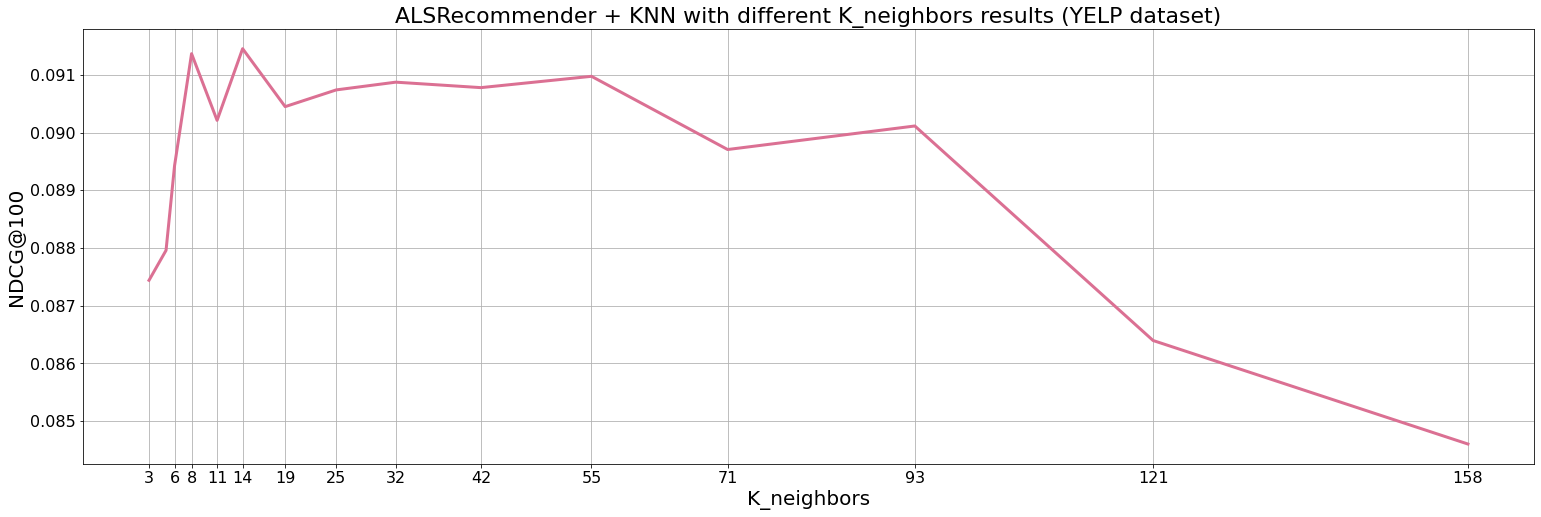

In [125]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (YELP dataset)', size=22)
plt.plot(K, n100, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_n100_y.png')
plt.show()

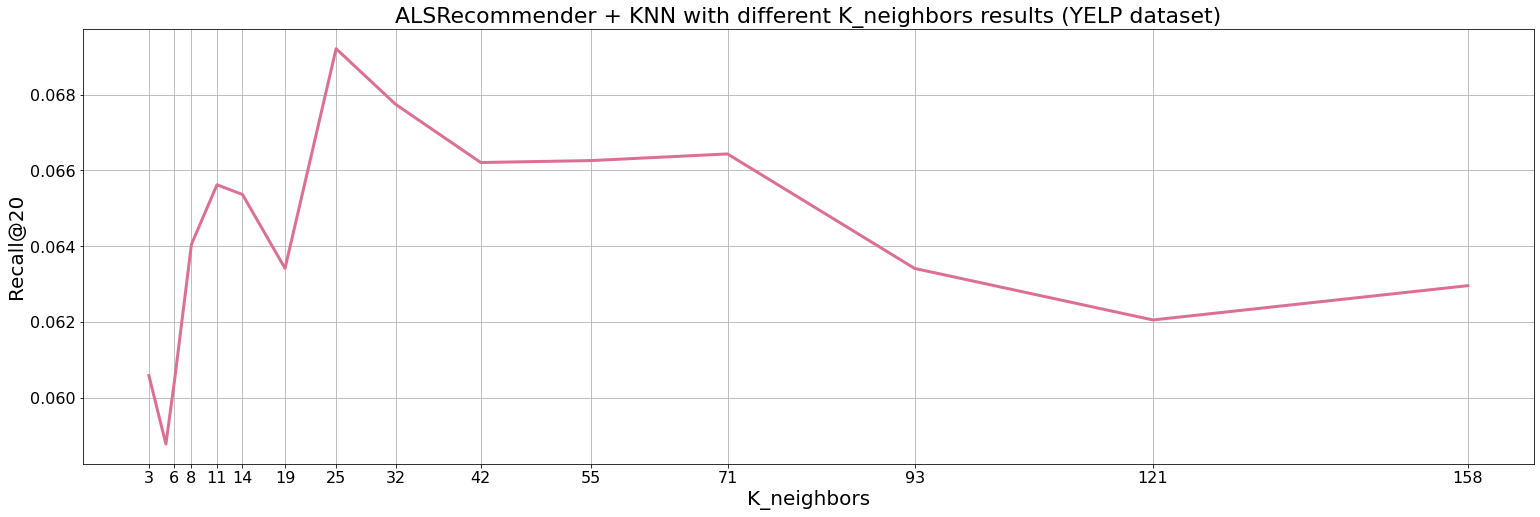

In [172]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (YELP dataset)', size=22)
plt.plot(K, r20, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r20_y.png')
plt.show()

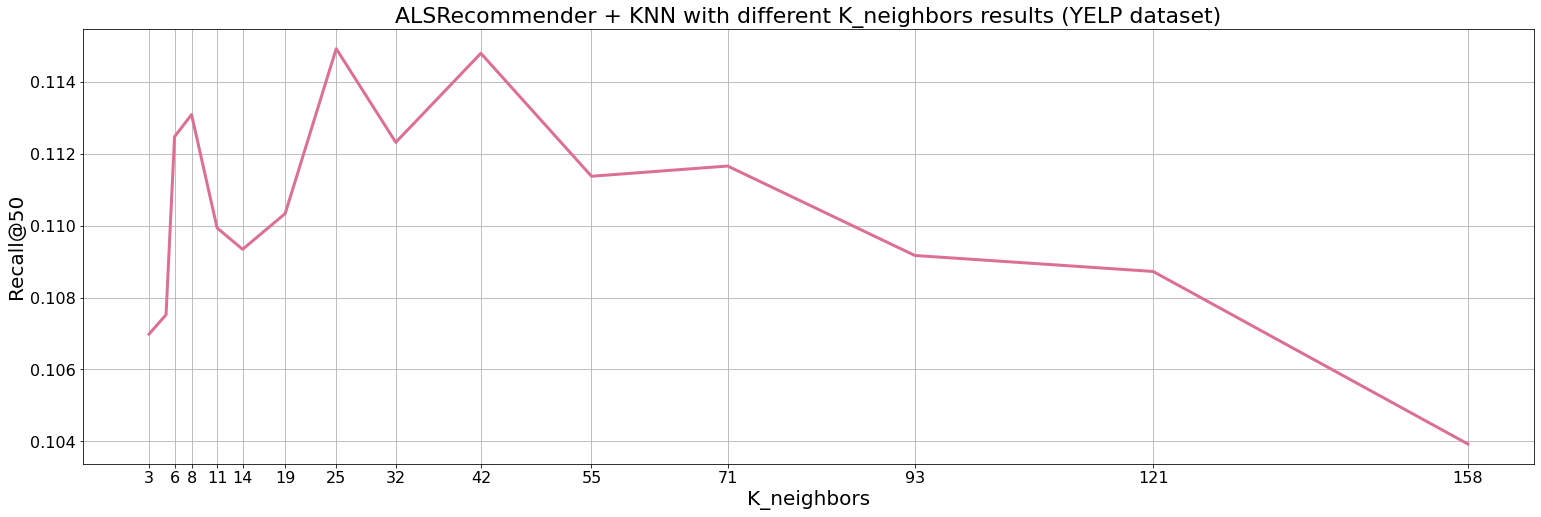

In [127]:
plt.figure(figsize=(26, 8))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (YELP dataset)', size=22)
plt.plot(K, r50, color='palevioletred', linewidth=3)
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig('KNN_r50_y.png')
plt.show()

In [15]:
n20m = [0.2273258744443669, 0.25171740871412757, 0.266849912018505, 0.2759532029793227, 0.2836899448326061, 0.289369347340453, 0.29667971213660566, 0.30472152154059357, 0.3132342319995783, 0.31799955008973346, 0.32257350863815576, 0.32650780776221044, 0.3333356325320548, 0.33730235128467106, 0.3407706902991289, 0.3448670206421751, 0.3479263536051792, 0.351670648185757, 0.348092130016495, 0.34962346580390224, 0.35181227068574583, 0.35078264486507227, 0.3492206103407307, 0.34466820260527714, 0.34461142973820347]
n100m = [0.3300916485144728, 0.35058888905579805, 0.36528944449929174, 0.369068241219558, 0.3741020498927766, 0.37976119453452667, 0.3847445152539975, 0.38806124714112766, 0.3944191066550245, 0.3967340641955651, 0.40084389275039073, 0.40082660194166847, 0.4038257620036917, 0.40628117433022803, 0.4073656524190853, 0.4079407584568567, 0.408149018105469, 0.4087454237295535, 0.40621534996956066, 0.40565300296587187, 0.40512391262906716, 0.40351945187657784, 0.3996576921460411, 0.39565091021135346, 0.39500744339215865]
r20m = [0.2545903418348078, 0.2704726174367428, 0.28098466479341094, 0.29388657491459347, 0.3008479601409942, 0.3053714154524526, 0.3093527434940361, 0.32102458390852356, 0.322326994891933, 0.3285528899162413, 0.3286532964283738, 0.3331160079815265, 0.33545568307251744, 0.33846658573624516, 0.33891203936242636, 0.3436307040740477, 0.342028118871153, 0.34384638273663043, 0.339949833675956, 0.34173706017494715, 0.3409403930993327, 0.33792581176133807, 0.3357958011888352, 0.3332092165918017, 0.32975634948556776]
r50m = [0.3637029836564283, 0.374215049590986, 0.3856163184662161, 0.3912232787439264, 0.3944325026689573, 0.39655254462356393, 0.4033990625645353, 0.40483758185239943, 0.40928172059889795, 0.41493018462870596, 0.41439307982333007, 0.4141836012940439, 0.4137039397570319, 0.4130720181656413, 0.4121651224816771, 0.4146493343416275, 0.4135856491558142, 0.4126116377509137, 0.41055958913900226, 0.4082597355132579, 0.4054520678908457, 0.40234392027579824, 0.4019871085679506, 0.39798856983139297, 0.39295796214644335]
n20m = np.array(n20m)[[0, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24]]
n100m = np.array(n100m)[[0, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24]]
r20m = np.array(r20m)[[0, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24]]
r50m = np.array(r50m)[[0, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24]]
n20a = [0.03684226437328258, 0.03607800712777516, 0.03878489815298244, 0.04001830550642643, 0.037964569282047146, 0.040739612709690946, 0.03844185107832777, 0.03814031311762886, 0.03790710286964872, 0.0373543116119364, 0.03563970880756722, 0.033989076031606946, 0.03546698873533755, 0.03151341643941101, 0.030774838377708644]
n100a = [0.058047536116155755, 0.061023719153560786, 0.06171596660315803, 0.06446286481096303, 0.06421823501818456, 0.06659836765571775, 0.06248814140674241, 0.06426705500329698, 0.06348648687379481, 0.06315943898949881, 0.06144168897214109, 0.05949921639710869, 0.06016714539483239, 0.05644341766933364, 0.052858491265548604]
r20a = [0.04124980768609767, 0.040763439872149324, 0.04368318640038374, 0.044655095797298074, 0.041282315587891937, 0.043398464960480276, 0.042570095415832614, 0.042005865427037825, 0.042132403574412426, 0.041139492921400324, 0.04185029450006305, 0.0379254029517367, 0.03874624922458339, 0.034793831106431784, 0.03735400733682078]
r50a = [0.06873173033613557, 0.06778476414729784, 0.06897862492672126, 0.07031968121077171, 0.07257218527397638, 0.07229119902727761, 0.06962382399308992, 0.0706255010938743, 0.07037298114290046, 0.0719511622305256, 0.06926125506596438, 0.06676708698780089, 0.06695129616700078, 0.06366687316414593, 0.059767922658302435]
n20g = [0.11091029349042662, 0.11466288847929648, 0.1145875215781529, 0.11570065844559661, 0.11455529011001765, 0.11521696812485308, 0.11503293236959518, 0.10990042648089429, 0.10649330639583014, 0.10463701440437055, 0.10083071300039882, 0.09639183794691941, 0.09406800320849971, 0.08874599083843267, 0.08270327711408586]
n100g = [0.15622371435877133, 0.15894320928967484, 0.1602613844284049, 0.15916044730569193, 0.16046892784903052, 0.16020708281450108, 0.158875927682807, 0.1548364316552239, 0.15147487749718802, 0.14518870904906978, 0.1397553211465905, 0.13546992894573734, 0.1297623198917383, 0.12032413405521372, 0.11256532653482505]
r20g = [0.12249542423221482, 0.12747043379999157, 0.12760615166652922, 0.12644070826980255, 0.1241437173384033, 0.12090218275057386, 0.12292683789256102, 0.11752117693148757, 0.11183324588526251, 0.11503027544958014, 0.106932161173829, 0.09795420778294461, 0.09494204081889551, 0.0908025167588005, 0.08621324252151925]
r50g = [0.18302143238600133, 0.19015697418560165, 0.18597455686205078, 0.18892107912733322, 0.18789992332540056, 0.18458720697090766, 0.18882615870606984, 0.18360928204976654, 0.1751657134638431, 0.16848049788514866, 0.15921209704704636, 0.14927075396737136, 0.14127589829300155, 0.1356757375367575, 0.1243641411661518]
n20y = [0.05028171279176087, 0.0492513140911097, 0.05065130944888141, 0.053702767781217756, 0.0539666144703899, 0.05429304401029861, 0.052518340854405855, 0.056758026390024904, 0.056818056210850246, 0.05516457937969526, 0.0553915718378597, 0.054794494215178416, 0.05379979895462937, 0.051371465097008115, 0.05092455059383877]
n100y = [0.08743792540680613, 0.08795714138802094, 0.08942277638406834, 0.09136623616111213, 0.09021051877717341, 0.09145283969015246, 0.09044837483746784, 0.09073827917036685, 0.09087256876381318, 0.09077778038150104, 0.0909740817797132, 0.08970497363295162, 0.090112968646012, 0.08639444114690988, 0.08459997172958544]
r20y = [0.06059373972080189, 0.05878838733666036, 0.0604402035676349, 0.06405145897365631, 0.06562369979583664, 0.06536736136578235, 0.0634199315323173, 0.06921117602596659, 0.06774392221191392, 0.0662100622450114, 0.06626138888069871, 0.06643654678485951, 0.0634171862979323, 0.06205962696086907, 0.06296329816869348]
r50y = [0.10698387051980837, 0.10752254716520164, 0.11247707887437465, 0.11309555322041236, 0.10993989537476333, 0.10934411775438428, 0.11033937868706378, 0.11492903339989527, 0.11232226009488325, 0.1148009268149129, 0.11137784975615893, 0.11166249260829399, 0.10917273860193166, 0.1087281503049716, 0.1039237464714402]
K = np.logspace(0.6, 2.2, num=15, dtype=int)

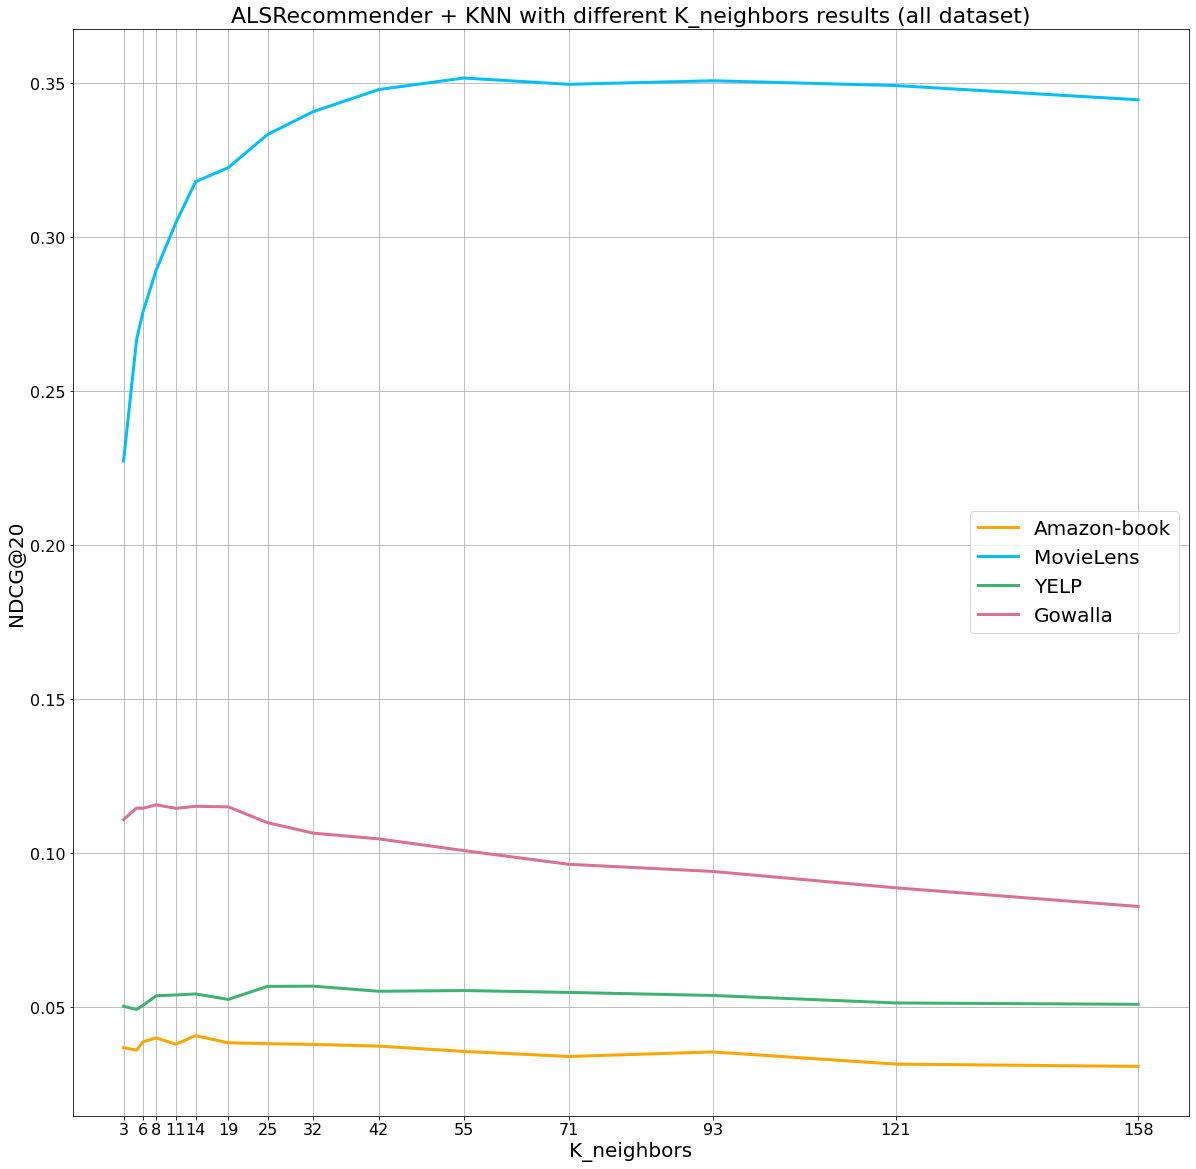

In [210]:
plt.figure(figsize=(20, 20))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (all dataset)', size=22)
plt.plot(K, n20a, color='orange', linewidth=3, label='Amazon-book')
plt.plot(K, n20m, color='deepskyblue', linewidth=3, label='MovieLens')
plt.plot(K, n20y, color='mediumseagreen', linewidth=3, label='YELP')
plt.plot(K, n20g, color='palevioletred', linewidth=3, label='Gowalla')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_all_y.png')
plt.show()

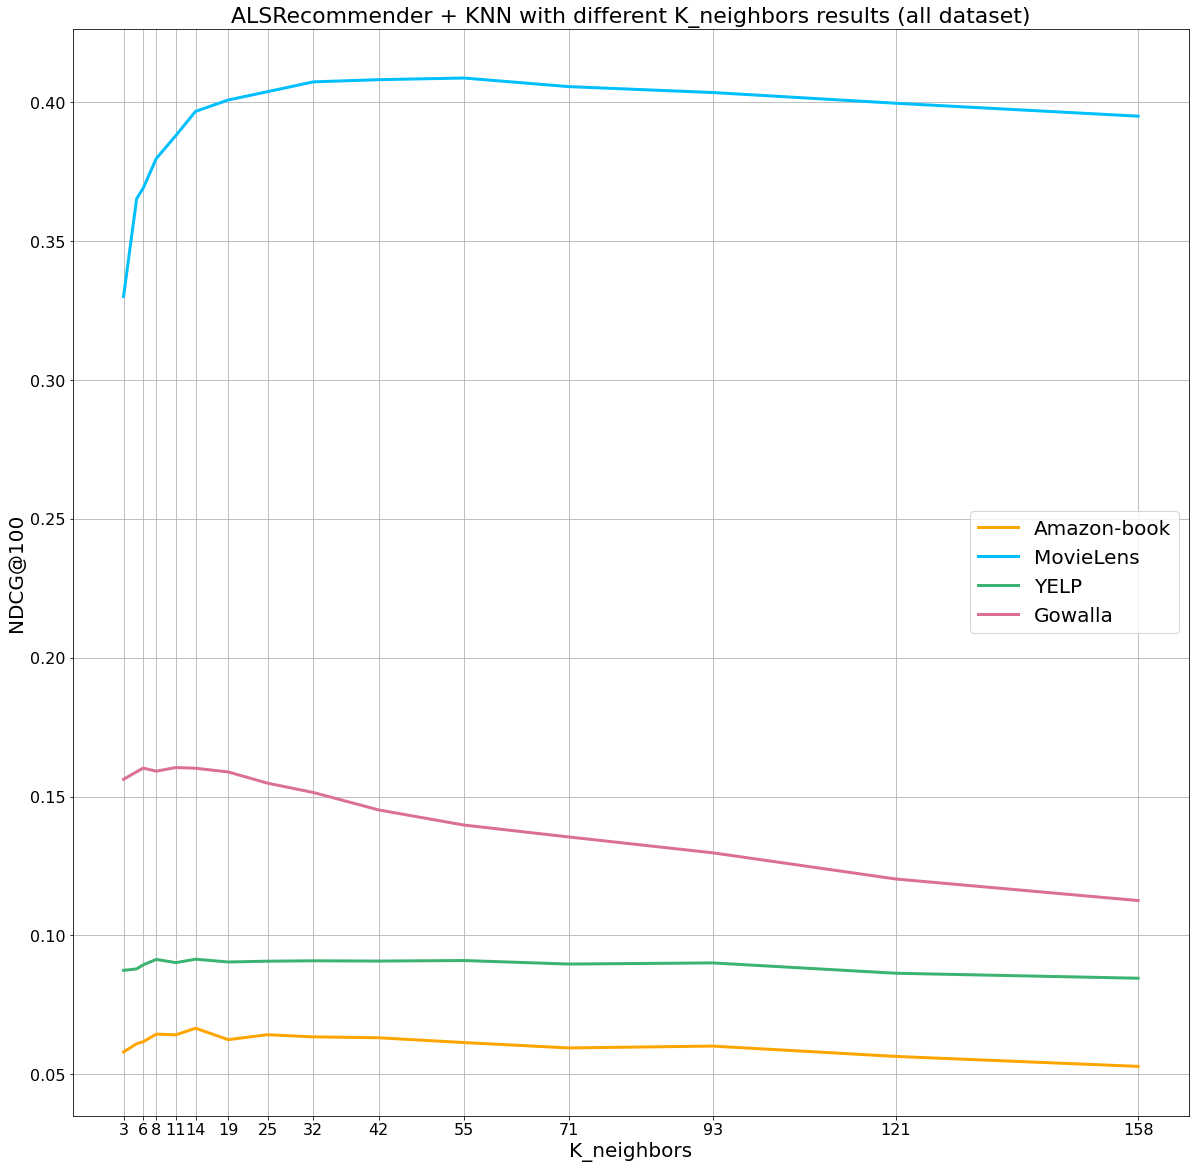

In [209]:
plt.figure(figsize=(20, 20))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('NDCG@100', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (all dataset)', size=22)
plt.plot(K, n100a, color='orange', linewidth=3, label='Amazon-book')
plt.plot(K, n100m, color='deepskyblue', linewidth=3, label='MovieLens')
plt.plot(K, n100y, color='mediumseagreen', linewidth=3, label='YELP')
plt.plot(K, n100g, color='palevioletred', linewidth=3, label='Gowalla')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_all_y.png')
plt.show()

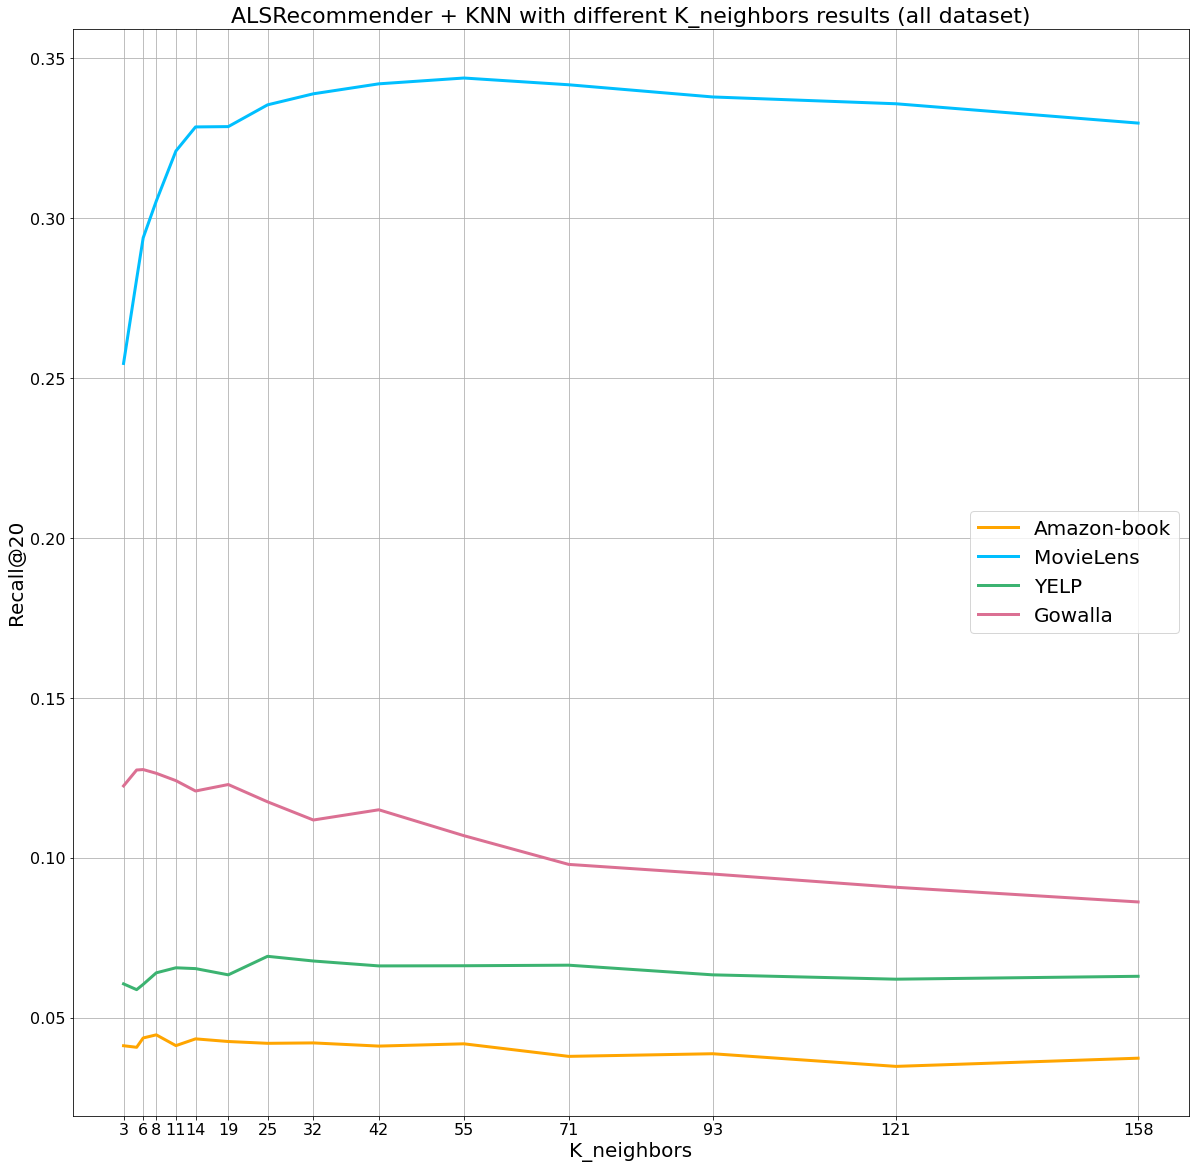

In [208]:
plt.figure(figsize=(20, 20))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@20', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (all dataset)', size=22)
plt.plot(K, r20a, color='orange', linewidth=3, label='Amazon-book')
plt.plot(K, r20m, color='deepskyblue', linewidth=3, label='MovieLens')
plt.plot(K, r20y, color='mediumseagreen', linewidth=3, label='YELP')
plt.plot(K, r20g, color='palevioletred', linewidth=3, label='Gowalla')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_all_y.png')
plt.show()

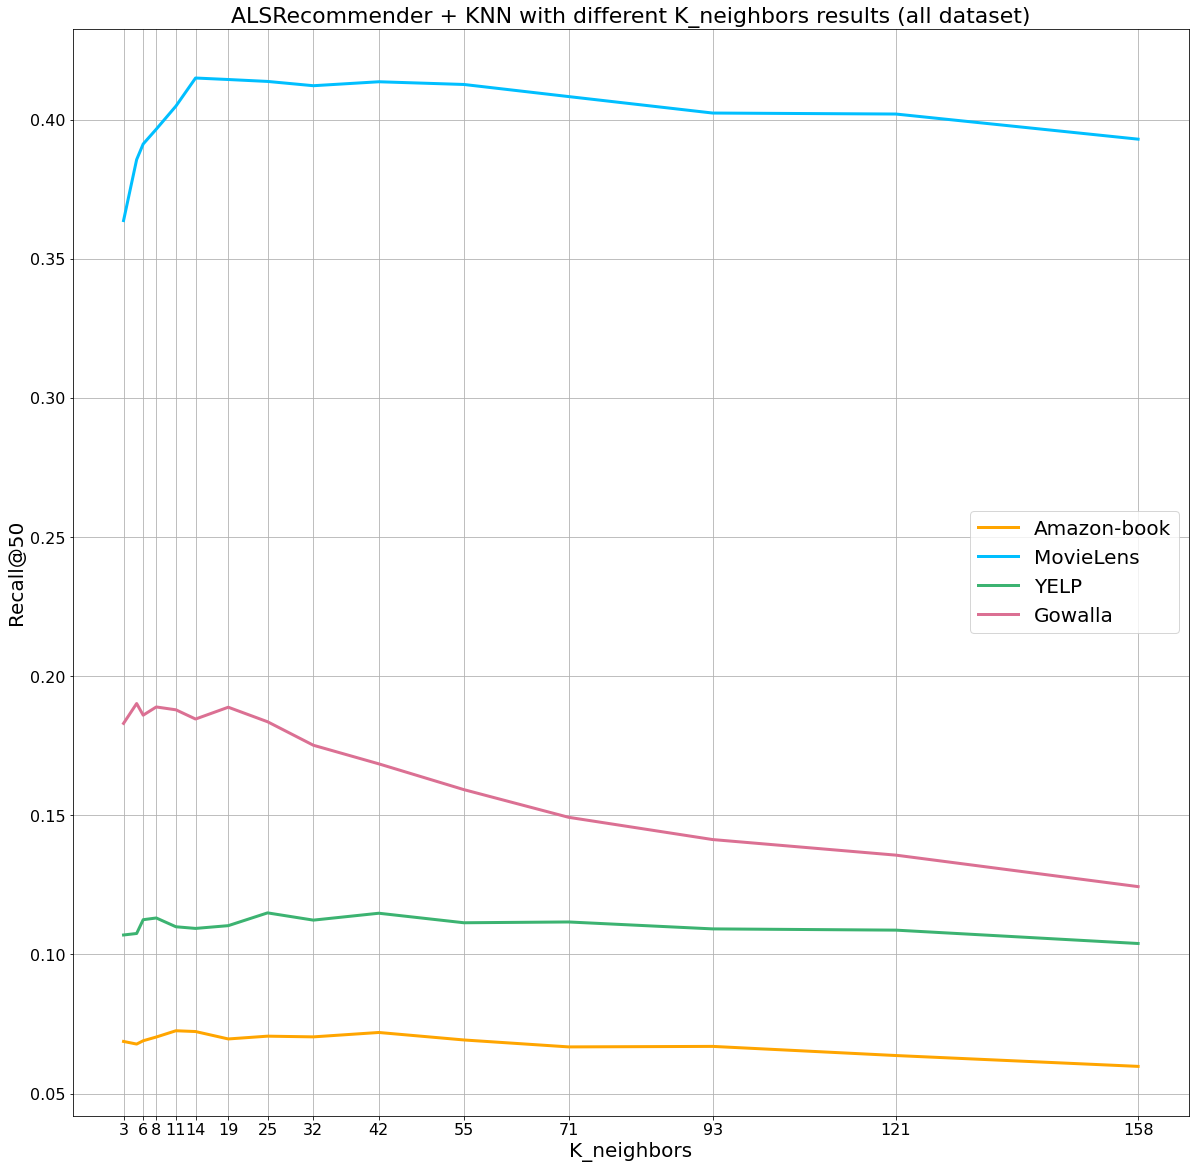

In [207]:
plt.figure(figsize=(20, 20))
plt.xlabel('K_neighbors', size=20)
plt.ylabel('Recall@50', size=20) 
plt.title('ALSRecommender + KNN with different K_neighbors results (all dataset)', size=22)
plt.plot(K, r50a, color='orange', linewidth=3, label='Amazon-book')
plt.plot(K, r50m, color='deepskyblue', linewidth=3, label='MovieLens')
plt.plot(K, r50y, color='mediumseagreen', linewidth=3, label='YELP')
plt.plot(K, r50g, color='palevioletred', linewidth=3, label='Gowalla')
plt.xticks([3, 6, 8, 11, 14, 19, 25, 32, 42, 55, 71, 93, 121, 158], fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('KNN_all_y.png')
plt.show()

Weight

In [22]:
#ml-1m
! PYTHONPATH=. python scripts/test_find_best_k.py --data=ml-1m --db_path=../results/

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 8/8 [00:13<00:00,  1.69s/it]
0.4135519506093304
K_neighbors: 50
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.3486 | n100 0.4091 | r20 0.3417 | r50 0.4141
n20: [0.3486344490369262]
n100: [0.40911015995393357]
r20: [0.34171861350723576]
r50: [0.41412134770894293]


In [24]:
#gowalla
! PYTHONPATH=. python scripts/test_find_best_k.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [01:24<00:00, 21.04s/it]
0.20135005795073663
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1257 | n100 0.1687 | r20 0.1352 | r50 0.2014
n20: [0.1256991655525661]
n100: [0.1687282047699595]
r20: [0.13515341172558665]
r50: [0.20135005795073663]


In [34]:
#yelp
! PYTHONPATH=. python scripts/test_find_best_k.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:55<00:00, 13.90s/it]
0.11466037886139858
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0528 | n100 0.0920 | r20 0.0645 | r50 0.1147
n20: [0.05284918646491816]
n100: [0.0920071266566665]
r20: [0.06453051763151677]
r50: [0.11466037886139858]


In [36]:
#amazon-book
! PYTHONPATH=. python scripts/test_find_best_k.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
100%|█████████████████████████████████████████████| 5/5 [02:31<00:00, 30.27s/it]
0.07420631767661102
K_neighbors: 15
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0406 | n100 0.0633 | r20 0.0446 | r50 0.0742
n20: [0.040594790333132666]
n100: [0.0633306667198213]
r20: [0.044645610563483776]
r50: [0.07420631767661102]


Blending

In [8]:
#yelp2018
! PYTHONPATH=. python test_topK.py --data=yelp2018 --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
(38048, 64)
100%|█████████████████████████████████████████████| 5/5 [01:05<00:00, 13.10s/it]
0.07594083075750255
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0226 | n100 0.0590 | r20 0.0320 | r50 0.0759
n20: [0.022646426630191924]
n100: [0.058955701537465946]
r20: [0.03204883835308503]
r50: [0.07594083075750255]


In [11]:
#gowalla
! PYTHONPATH=. python test_topK.py --data=gowalla --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
(3993, 40981)
Sparsity: 0.9986615140708924
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
100%|█████████████████████████████████████████████| 4/4 [02:18<00:00, 34.62s/it]
0.14174381885614576
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0522 | n100 0.1007 | r20 0.0742 | r50 0.1417
n20: [0.052191542122940075]
n100: [0.10071311056631309]
r20: [0.0741937127944525]
r50: [0.14174381885614576]


In [10]:
#amazon-book
! PYTHONPATH=. python test_topK.py --data=amazon-book --db_path=../results/ --n_users=5000

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
(91599, 64)
100%|█████████████████████████████████████████████| 5/5 [02:26<00:00, 29.37s/it]
0.051097907849059196
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
K_neighbors: 15
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0199 | n100 0.0411 | r20 0.0248 | r50 0.0511
n20: [0.01986546564910251]
n100: [0.041113484882914914]
r20: [0.024821689861630865]
r50: [0.051097907849059196]


In [12]:
#ml-1m
! PYTHONPATH=. python  test_topK.py --data=ml-1m --db_path=../results/ 

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
(4039, 3674)
Sparsity: 0.9555838468238971
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
100%|█████████████████████████████████████████████| 8/8 [00:26<00:00,  3.30s/it]
0.13204463508810627
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
K_neighbors: 50
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0595 | n100 0.1276 | r20 0.0708 | r50 0.1387
n20: [0.05945014794584367]
n100: [0.12760573905697958]
r20: [0.07077261783194444]
r50: [0.13867553274933572]


In [11]:
#ml-1m
! PYTHONPATH=. python  test_topK.py --data=ml-1m --db_path=../results/ 

/opt/conda/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
(3674, 64)
100%|█████████████████████████████████████████████| 8/8 [00:13<00:00,  1.63s/it]
0.13571201092815072
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
K_neighbors: 50
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0612 | n100 0.1295 | r20 0.0735 | r50 0.1402
n20: [0.06115113819132445]
n100: [0.1294534555318312]
r20: [0.07349763452062213]
r50: [0.14015201049880952]


Boosting

In [44]:
#ml-1m

start = time()
! PYTHONPATH=. python test_topK.py --data=ml-1m --db_path=../results/
print('Время:', (time() - start) / 60)

{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 1000}
100%|█████████████████████████████████████████████| 8/8 [00:25<00:00,  3.20s/it]
0.435484039369075
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 1000}
K_neighbors: 50
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.3651 | n100 0.4225 | r20 0.3643 | r50 0.4345
n20: [0.36509104798777814]
n100: [0.4225345607541457]
r20: [0.3642952500801572]
r50: [0.434473657962054]
Время: 5.320576997598012


In [6]:
#gowalla

start = time()
! PYTHONPATH=. python test_topK.py --data=gowalla --db_path=../results/ --n_users=5000
print('Время:', (time() - start) / 60)

{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
100%|█████████████████████████████████████████████| 5/5 [01:08<00:00, 13.74s/it]
0.18141654082497147
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.1093 | n100 0.1532 | r20 0.1209 | r50 0.1814
n20: [0.10926420341623032]
n100: [0.15315008158973878]
r20: [0.12092771638612772]
r50: [0.18141654082497147]
Время: 15.53857581615448


In [7]:
#yelp2018

start = time()
! PYTHONPATH=. python test_topK.py --data=yelp2018 --db_path=../results/ --n_users=5000
print('Время:', (time() - start) / 60)

{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
100%|█████████████████████████████████████████████| 5/5 [01:14<00:00, 14.81s/it]
0.11022952151953802
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 1000}
K_neighbors: 25
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0461 | n100 0.0842 | r20 0.0612 | r50 0.1102
n20: [0.046149063365954715]
n100: [0.08421471285940708]
r20: [0.061161882059570204]
r50: [0.11022952151953802]
Время: 14.269412394364675


In [6]:
#amazon-book

start = time()
! PYTHONPATH=. python test_topK.py --data=amazon-book --db_path=../results/ --n_users=3000
print('Время:', (time() - start) / 60)

(2399, 91599)
Sparsity: 0.9989990216022179
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
100%|█████████████████████████████████████████████| 3/3 [01:47<00:00, 35.70s/it]
0.06362144547824931
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 15, 'topK': 100}
K_neighbors: 15
Similarity function: angular
| Func: OtherRecsALSRecommenderKNN| n20 0.0384 | n100 0.0579 | r20 0.0416 | r50 0.0636
n20: [0.038418252824358776]
n100: [0.05789176354672487]
r20: [0.04164845206000787]
r50: [0.06362144547824931]
Время: 17.58901039759318


Sparsity

In [8]:
#amazon-book

start = time()
! PYTHONPATH=. python test_topK.py --data=amazon-book --db_path=../results/ --n_users=5000
print('Время:', (time() - start) / 60)

(3984, 91599)
Sparsity: 0.9990772953274467
^C
Traceback (most recent call last):
  File "test_topK.py", line 150, in <module>
    vad_data_tr, vad_data_te = loader.load_data('validation')
  File "/workspace/oos/src/src/scripts/preprocess_other_datasets.py", line 64, in load_data
    return self._load_tr_te_data(datatype)
  File "/workspace/oos/src/src/scripts/preprocess_other_datasets.py", line 79, in _load_tr_te_data
    inp = sps.csr_matrix(self.valid_matrix_input)
  File "/opt/conda/lib/python3.8/site-packages/scipy/sparse/compressed.py", line 86, in __init__
    self._set_self(self.__class__(coo_matrix(arg1, dtype=dtype)))
  File "/opt/conda/lib/python3.8/site-packages/scipy/sparse/coo.py", line 189, in __init__
    self.row, self.col = M.nonzero()
KeyboardInterrupt
Время: 0.39068509737650553


In [9]:
#gowalla

start = time()
! PYTHONPATH=. python test_topK.py --data=gowalla --db_path=../results/ --n_users=5000
print('Время:', (time() - start) / 60)

(3974, 40981)
Sparsity: 0.99867297679911
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
^C
Время: 0.2644772966702779


In [10]:
#yelp2018

start = time()
! PYTHONPATH=. python test_topK.py --data=yelp2018 --db_path=../results/ --n_users=5000
print('Время:', (time() - start) / 60)

(3992, 38048)
Sparsity: 0.9983089273058312
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 25, 'topK': 100}
^C
Время: 0.30054319302241006


In [11]:
#ml-1m

start = time()
! PYTHONPATH=. python test_topK.py --data=ml-1m --db_path=../results/
print('Время:', (time() - start) / 60)

(4039, 3674)
Sparsity: 0.9555838468238971
{'metric': 'angular', 'alpha': 40, 'factors': 64, 'K': 50, 'topK': 100}
^C
Время: 0.15058022340138752
